In [5]:
import pyopenms as oms
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append(r"..")
import microspot_util as msu
import microspot_util.plots as plots
from tslearn.metrics import dtw as ts_dtw
import scipy.stats as stats
import numpy as np

In [6]:
exp = oms.MSExperiment()
oms.MzMLFile().load("../test_mzml/231004_TestAB_1.mzML", exp)

ft=msu.feature_finding(
    exp=exp,
    mass_error=10,
    noise_threshold=1e5,
    min_fwhm=1,
    max_fwhm=60
)

ft

Progress of 'mass trace detection':
-- done [took 16.09 s (CPU), 15.90 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 0.43 s (CPU), 0.06 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 0.30 s (CPU), 0.04 s (Wall)] -- 


charge          RT           mz     RTstart       RTend  \
feature_id                                                                      
4505993885779535687        3   67.913730   150.768212   64.942854   85.729362   
11169255465747097631       3  239.490684   155.440220  199.978920  312.449100   
7752062033995956958        3   68.554974   160.112047   63.663474   87.363738   
12741614756258880660       3  239.490684   160.112236  182.125662  313.114722   
15061853589393812048       1  133.022508   164.092734  126.841506  192.029040   
...                      ...         ...          ...         ...         ...   
10079791676458148212       1   69.675978  1059.556565   66.709224   77.889360   
14868956581713546604       1   68.554974  1063.554478   66.282102   81.485112   
15880742162521482515       1   69.675978  1163.538372   66.282102   81.485112   
1560104178964293506        1   72.994356  1181.544734   66.709224   80.624862   
3137339203469811712        1   70.840860  1199.556594   66.709224   82.290612   

                          MZstart        MZend   quality    intensity  
feature_id                                                             
4505993885779535687    150.768082   151.102859  0.000309   24854486.0  
11169255465747097631   155.439865   155.774811  0.000211   17428608.0  
7752062033995956958    160.112000   160.781265  0.001772  143574000.0  
12741614756258880660   160.112015   160.446945  0.000264   22184716.0  
15061853589393812048   164.092651   165.096222  0.000429   38557404.0  
...                           ...          ...       ...          ...  
10079791676458148212  1059.549438  1060.572266  0.000277   22765870.0  
14868956581713546604  1063.551025  1064.561523  0.000282   17117024.0  
15880742162521482515  1163.532959  1165.548340  0.000965   53050496.0  
1560104178964293506   1181.539917  1183.560425  0.000803   43189708.0  
3137339203469811712   1199.554199  1201.571045  0.001693  115362592.0  

[134 rows x 9 columns]

In [7]:
# exp = oms.MSExperiment()
# oms.MzMLFile().load("../test_mzml/231004_TestAB_1.mzML", exp)

# exp.sortSpectra(True)

# mass_traces = []
# mtd = oms.MassTraceDetection()
# mtd_params = mtd.getDefaults()
# mtd_params.setValue(
#     "mass_error_ppm", float(10)
# )  # set according to your instrument mass error
# mtd_params.setValue(
#     "noise_threshold_int", float(1e5)
# )  # adjust to noise level in your data
# mtd.setParameters(mtd_params)
# mtd.run(exp, mass_traces, 0)

# mass_traces_split = []
# mass_traces_final = []
# epd = oms.ElutionPeakDetection()
# epd_params = epd.getDefaults()
# epd_params.setValue("width_filtering", "fixed")
# epd_params.setValue("min_fwhm",float(1))
# epd_params.setValue("max_fwhm",float(60))
# epd.setParameters(epd_params)
# epd.detectPeaks(mass_traces, mass_traces_split)

# if epd.getParameters().getValue("width_filtering") == "auto":
#     epd.filterByPeakWidth(mass_traces_split, mass_traces_final)
# else:
#     mass_traces_final = mass_traces_split

# fm = oms.FeatureMap()
# feat_chrom = []
# ffm = oms.FeatureFindingMetabo()
# ffm_params = ffm.getDefaults()
# ffm_params.setValue("isotope_filtering_model", "none")
# ffm_params.setValue(
#     "remove_single_traces", "true"
# )  # set false to keep features with only one mass trace
# ffm_params.setValue("mz_scoring_by_elements", "false")
# ffm_params.setValue("report_convex_hulls", "true")
# ffm.setParameters(ffm_params)
# ffm.run(mass_traces_final, fm, feat_chrom)

# fm.setUniqueIds()
# ft=fm.get_df()

# ft

peak_idx     RT      width  left_ips  right_ips  RTstart  RTend  \
7           7   68.0  10.123569         2         12     63.0   73.0   
178       178  239.0   4.530202       175        179    236.0  240.0   

     norm_intensity       AUC  
7          1.338950  7.175401  
178        0.044267  0.093907

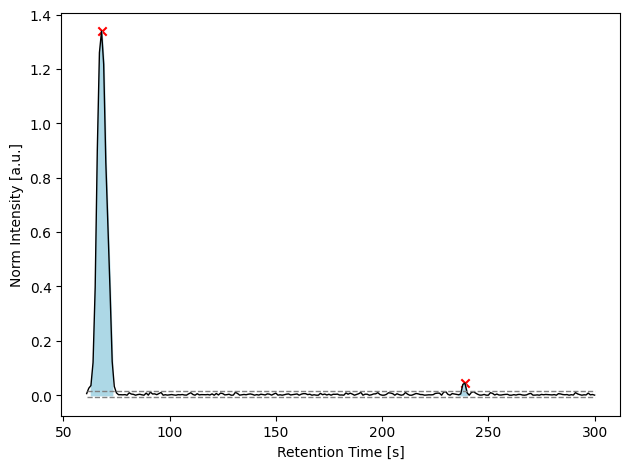

In [8]:
at=pd.read_csv("../output/output_concat.csv",index_col=0)
at.sort_values("RT",inplace=True)

aft=msu.peak_detection(
    df=at,
    baseline_convergence=0.02,
    rel_height=0.95,
    min_dist=10,
    datacolumn_name="norm_intensity"
)

fig,ax=plt.subplots()
plots.plot_activity_chromatogram(
    figure=fig,
    axs=ax,
    spot_df=at,
    peak_df=aft,
    baseline_acceptance=0.02,
    ydata_name="norm_intensity"
)

aft

In [9]:
msu.activity_annotation_features(ft,aft)

ft

charge          RT           mz     RTstart       RTend  \
feature_id                                                                      
4505993885779535687        3   67.913730   150.768212   64.942854   85.729362   
11169255465747097631       3  239.490684   155.440220  199.978920  312.449100   
7752062033995956958        3   68.554974   160.112047   63.663474   87.363738   
12741614756258880660       3  239.490684   160.112236  182.125662  313.114722   
15061853589393812048       1  133.022508   164.092734  126.841506  192.029040   
...                      ...         ...          ...         ...         ...   
10079791676458148212       1   69.675978  1059.556565   66.709224   77.889360   
14868956581713546604       1   68.554974  1063.554478   66.282102   81.485112   
15880742162521482515       1   69.675978  1163.538372   66.282102   81.485112   
1560104178964293506        1   72.994356  1181.544734   66.709224   80.624862   
3137339203469811712        1   70.840860  1199.556594   66.709224   82.290612   

                          MZstart        MZend   quality    intensity  \
feature_id                                                              
4505993885779535687    150.768082   151.102859  0.000309   24854486.0   
11169255465747097631   155.439865   155.774811  0.000211   17428608.0   
7752062033995956958    160.112000   160.781265  0.001772  143574000.0   
12741614756258880660   160.112015   160.446945  0.000264   22184716.0   
15061853589393812048   164.092651   165.096222  0.000429   38557404.0   
...                           ...          ...       ...          ...   
10079791676458148212  1059.549438  1060.572266  0.000277   22765870.0   
14868956581713546604  1063.551025  1064.561523  0.000282   17117024.0   
15880742162521482515  1163.532959  1165.548340  0.000965   53050496.0   
1560104178964293506   1181.539917  1183.560425  0.000803   43189708.0   
3137339203469811712   1199.554199  1201.571045  0.001693  115362592.0   

                      activity@68.0s  activity@239.0s  
feature_id                                             
4505993885779535687         7.175401              NaN  
11169255465747097631             NaN         0.093907  
7752062033995956958         7.175401              NaN  
12741614756258880660             NaN         0.093907  
15061853589393812048             NaN              NaN  
...                              ...              ...  
10079791676458148212        7.175401              NaN  
14868956581713546604        7.175401              NaN  
15880742162521482515        7.175401              NaN  
1560104178964293506         7.175401              NaN  
3137339203469811712         7.175401              NaN  

[134 rows x 11 columns]

In [10]:
specs={spec.getRT():{"mz":spec.get_peaks()[0],"int":spec.get_peaks()[1]} for spec in exp if spec.getMSLevel()==1}

xics={}
ft["size"]=np.nan
for i in ft.index:
    
    intsum_list=[]
    rtlist=[]

    for rt,pk in specs.items():

        if rt >= ft.loc[i,"RTstart"] and rt <= ft.loc[i,"RTend"]:

            intsum_list.append(pk["int"][(ft.loc[i,"MZstart"]<=pk["mz"]) & (ft.loc[i,"MZend"]>=pk["mz"])].sum())
            rtlist.append(rt)

    ft.loc[i,"size"]=len(rtlist)
    xics[i]=pd.DataFrame({"rt":rtlist,"int":intsum_list})

ft["rate"]=ft["size"]/(ft["RTend"]-ft["RTstart"])
ft


charge          RT           mz     RTstart       RTend  \
feature_id                                                                      
4505993885779535687        3   67.913730   150.768212   64.942854   85.729362   
11169255465747097631       3  239.490684   155.440220  199.978920  312.449100   
7752062033995956958        3   68.554974   160.112047   63.663474   87.363738   
12741614756258880660       3  239.490684   160.112236  182.125662  313.114722   
15061853589393812048       1  133.022508   164.092734  126.841506  192.029040   
...                      ...         ...          ...         ...         ...   
10079791676458148212       1   69.675978  1059.556565   66.709224   77.889360   
14868956581713546604       1   68.554974  1063.554478   66.282102   81.485112   
15880742162521482515       1   69.675978  1163.538372   66.282102   81.485112   
1560104178964293506        1   72.994356  1181.544734   66.709224   80.624862   
3137339203469811712        1   70.840860  1199.556594   66.709224   82.290612   

                          MZstart        MZend   quality    intensity  \
feature_id                                                              
4505993885779535687    150.768082   151.102859  0.000309   24854486.0   
11169255465747097631   155.439865   155.774811  0.000211   17428608.0   
7752062033995956958    160.112000   160.781265  0.001772  143574000.0   
12741614756258880660   160.112015   160.446945  0.000264   22184716.0   
15061853589393812048   164.092651   165.096222  0.000429   38557404.0   
...                           ...          ...       ...          ...   
10079791676458148212  1059.549438  1060.572266  0.000277   22765870.0   
14868956581713546604  1063.551025  1064.561523  0.000282   17117024.0   
15880742162521482515  1163.532959  1165.548340  0.000965   53050496.0   
1560104178964293506   1181.539917  1183.560425  0.000803   43189708.0   
3137339203469811712   1199.554199  1201.571045  0.001693  115362592.0   

                      activity@68.0s  activity@239.0s   size      rate  
feature_id                                                              
4505993885779535687         7.175401              NaN   32.0  1.539460  
11169255465747097631             NaN         0.093907  181.0  1.609315  
7752062033995956958         7.175401              NaN   38.0  1.603358  
12741614756258880660             NaN         0.093907  212.0  1.618456  
15061853589393812048             NaN              NaN  102.0  1.564716  
...                              ...              ...    ...       ...  
10079791676458148212        7.175401              NaN   19.0  1.699443  
14868956581713546604        7.175401              NaN   25.0  1.644411  
15880742162521482515        7.175401              NaN   25.0  1.644411  
1560104178964293506         7.175401              NaN   23.0  1.652817  
3137339203469811712         7.175401              NaN   25.0  1.604478  

[134 rows x 13 columns]

In [16]:
width=aft.loc[7,"RTend"]-aft.loc[7,"RTstart"]
cutxic={}
for i, df in xics.items():
    df_cut=df.loc[(df["rt"]>ft.loc[i,"RT"]-0.5*width)&(df["rt"]<ft.loc[i,"RT"]+0.5*width)]
    cutxic[i]=df_cut


In [7]:
ft["pearson"]=np.nan

test=aft.loc[7]
for i,df in xics.items():
    interpRT=np.linspace(at.loc[test["right_ips"],"RT"],at.loc[test["left_ips"],"RT"],int(ft.loc[i,"size"]))
    interpInt=np.interp(interpRT,at.loc[test["left_ips"]:test["right_ips"],"RT"],at.loc[test["left_ips"]:test["right_ips"],"norm_intensity"])
    
    ft.loc[i,"pearson"]=stats.pearsonr(df["int"],interpInt).statistic

ft

charge          RT           mz     RTstart       RTend  \
feature_id                                                                      
4126544080038355496        3   67.913730   150.768212   64.942854   85.729362   
17351024538561601631       3  239.490684   155.440220  199.978920  312.449100   
8028740063486267008        3   68.554974   160.112047   63.663474   87.363738   
16846374082525263120       3  239.490684   160.112236  182.125662  313.114722   
16314674209875234          1  133.022508   164.092734  126.841506  192.029040   
...                      ...         ...          ...         ...         ...   
12616351700663357673       1   69.675978  1059.556565   66.709224   77.889360   
15206938438307791353       1   68.554974  1063.554478   66.282102   81.485112   
907252573296815239         1   69.675978  1163.538372   66.282102   81.485112   
101018773451702534         1   72.994356  1181.544734   66.709224   80.624862   
14705604079721825956       1   70.840860  1199.556594   66.709224   82.290612   

                          MZstart        MZend   quality    intensity  \
feature_id                                                              
4126544080038355496    150.768082   151.102859  0.000309   24854486.0   
17351024538561601631   155.439865   155.774811  0.000211   17428608.0   
8028740063486267008    160.112000   160.781265  0.001772  143574000.0   
16846374082525263120   160.112015   160.446945  0.000264   22184716.0   
16314674209875234      164.092651   165.096222  0.000429   38557404.0   
...                           ...          ...       ...          ...   
12616351700663357673  1059.549438  1060.572266  0.000277   22765870.0   
15206938438307791353  1063.551025  1064.561523  0.000282   17117024.0   
907252573296815239    1163.532959  1165.548340  0.000965   53050496.0   
101018773451702534    1181.539917  1183.560425  0.000803   43189708.0   
14705604079721825956  1199.554199  1201.571045  0.001693  115362592.0   

                      activity@68.0s  activity@239.0s   size      rate  \
feature_id                                                               
4126544080038355496         7.175401              NaN   32.0  1.539460   
17351024538561601631             NaN         0.093907  181.0  1.609315   
8028740063486267008         7.175401              NaN   38.0  1.603358   
16846374082525263120             NaN         0.093907  212.0  1.618456   
16314674209875234                NaN              NaN  102.0  1.564716   
...                              ...              ...    ...       ...   
12616351700663357673        7.175401              NaN   19.0  1.699443   
15206938438307791353        7.175401              NaN   25.0  1.644411   
907252573296815239          7.175401              NaN   25.0  1.644411   
101018773451702534          7.175401              NaN   23.0  1.652817   
14705604079721825956        7.175401              NaN   25.0  1.604478   

                       pearson  
feature_id                      
4126544080038355496  -0.016014  
17351024538561601631  0.098710  
8028740063486267008   0.362957  
16846374082525263120  0.385453  
16314674209875234    -0.246573  
...                        ...  
12616351700663357673  0.626570  
15206938438307791353  0.005138  
907252573296815239    0.792545  
101018773451702534    0.882363  
14705604079721825956  0.800582  

[134 rows x 14 columns]

In [8]:
set_rate=ft.rate.mean()

test=aft.loc[7]
curr_t=at.loc[test["right_ips"],"RT"]-at.loc[test["left_ips"],"RT"]
set_len=int(set_rate*curr_t)

interpRT=np.linspace(at.loc[test["right_ips"],"RT"],at.loc[test["left_ips"],"RT"],set_len)

interpInt=np.interp(interpRT,at.loc[test["left_ips"]:test["right_ips"],"RT"],at.loc[test["left_ips"]:test["right_ips"],"norm_intensity"])
interpAP=pd.DataFrame({"RT":interpRT,"Int":interpInt})


In [9]:
interpAP["norm_int"]=interpAP.Int/interpAP.Int.max()

for i,df in xics.items():
    ftpeak=df.int/df.int.max()
    distance=ts_dtw(interpAP.norm_int,ftpeak)
    ft.loc[i,"dist"]=distance

ft

charge          RT           mz     RTstart       RTend  \
feature_id                                                                      
4126544080038355496        3   67.913730   150.768212   64.942854   85.729362   
17351024538561601631       3  239.490684   155.440220  199.978920  312.449100   
8028740063486267008        3   68.554974   160.112047   63.663474   87.363738   
16846374082525263120       3  239.490684   160.112236  182.125662  313.114722   
16314674209875234          1  133.022508   164.092734  126.841506  192.029040   
...                      ...         ...          ...         ...         ...   
12616351700663357673       1   69.675978  1059.556565   66.709224   77.889360   
15206938438307791353       1   68.554974  1063.554478   66.282102   81.485112   
907252573296815239         1   69.675978  1163.538372   66.282102   81.485112   
101018773451702534         1   72.994356  1181.544734   66.709224   80.624862   
14705604079721825956       1   70.840860  1199.556594   66.709224   82.290612   

                          MZstart        MZend   quality    intensity  \
feature_id                                                              
4126544080038355496    150.768082   151.102859  0.000309   24854486.0   
17351024538561601631   155.439865   155.774811  0.000211   17428608.0   
8028740063486267008    160.112000   160.781265  0.001772  143574000.0   
16846374082525263120   160.112015   160.446945  0.000264   22184716.0   
16314674209875234      164.092651   165.096222  0.000429   38557404.0   
...                           ...          ...       ...          ...   
12616351700663357673  1059.549438  1060.572266  0.000277   22765870.0   
15206938438307791353  1063.551025  1064.561523  0.000282   17117024.0   
907252573296815239    1163.532959  1165.548340  0.000965   53050496.0   
101018773451702534    1181.539917  1183.560425  0.000803   43189708.0   
14705604079721825956  1199.554199  1201.571045  0.001693  115362592.0   

                      activity@68.0s  activity@239.0s   size      rate  \
feature_id                                                               
4126544080038355496         7.175401              NaN   32.0  1.539460   
17351024538561601631             NaN         0.093907  181.0  1.609315   
8028740063486267008         7.175401              NaN   38.0  1.603358   
16846374082525263120             NaN         0.093907  212.0  1.618456   
16314674209875234                NaN              NaN  102.0  1.564716   
...                              ...              ...    ...       ...   
12616351700663357673        7.175401              NaN   19.0  1.699443   
15206938438307791353        7.175401              NaN   25.0  1.644411   
907252573296815239          7.175401              NaN   25.0  1.644411   
101018773451702534          7.175401              NaN   23.0  1.652817   
14705604079721825956        7.175401              NaN   25.0  1.604478   

                       pearson      dist  
feature_id                                
4126544080038355496  -0.016014  0.385410  
17351024538561601631  0.098710  0.733762  
8028740063486267008   0.362957  0.399071  
16846374082525263120  0.385453  0.729785  
16314674209875234    -0.246573  0.672746  
...                        ...       ...  
12616351700663357673  0.626570  0.297799  
15206938438307791353  0.005138  0.434704  
907252573296815239    0.792545  0.383603  
101018773451702534    0.882363  0.300770  
14705604079721825956  0.800582  0.290312  

[134 rows x 15 columns]

/tmp/ipykernel_734/165839904.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots()


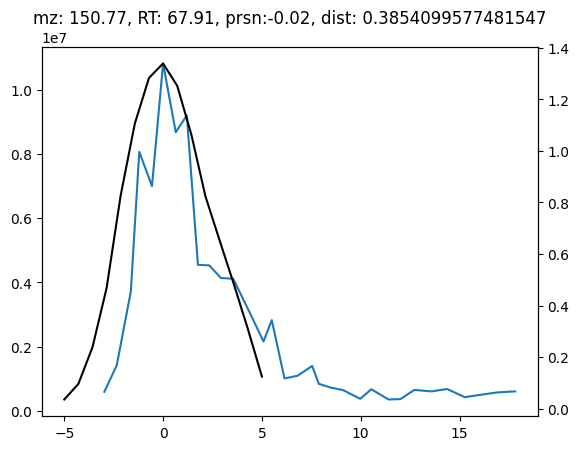

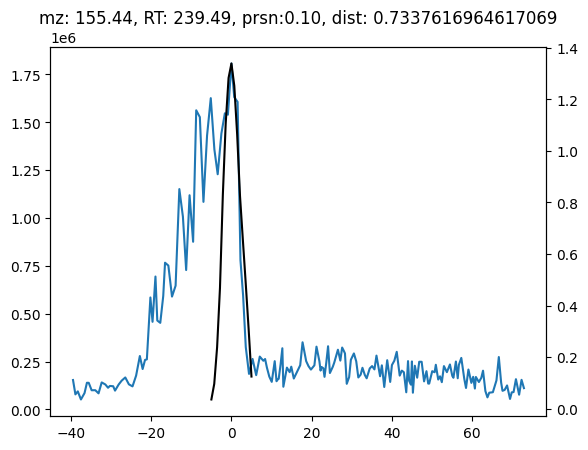

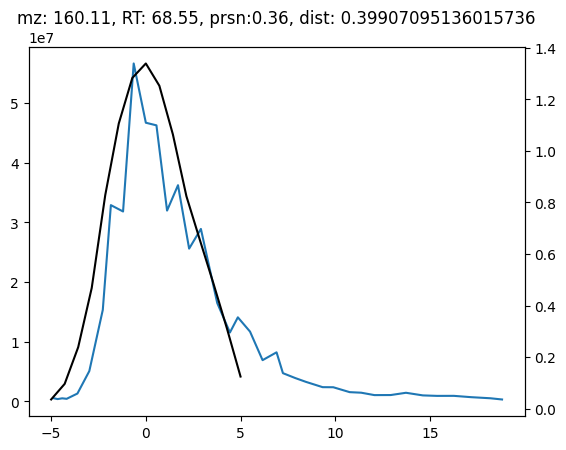

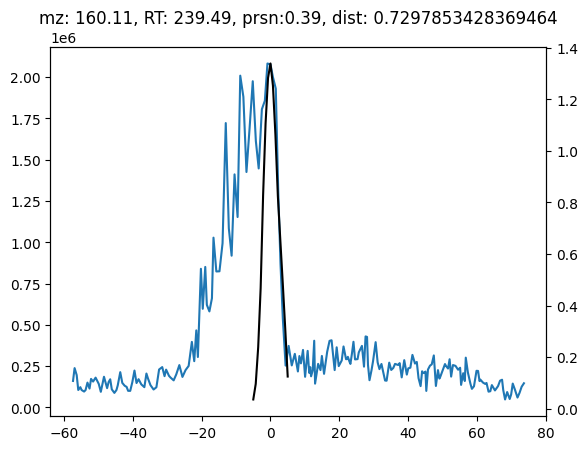

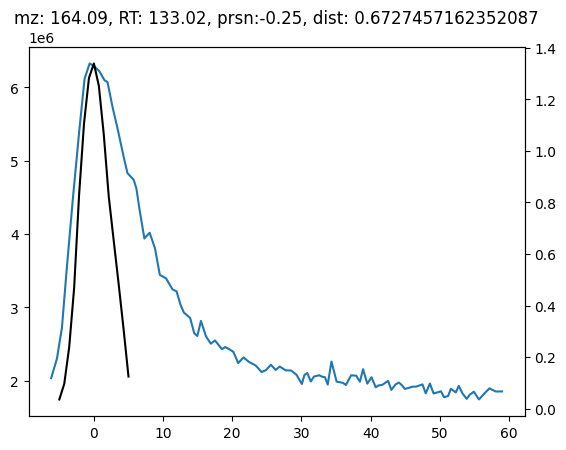

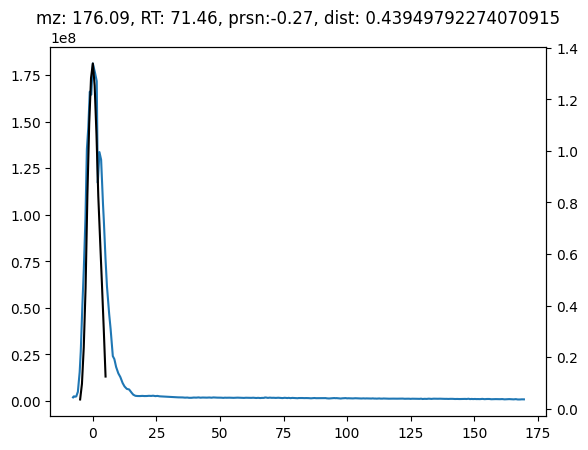

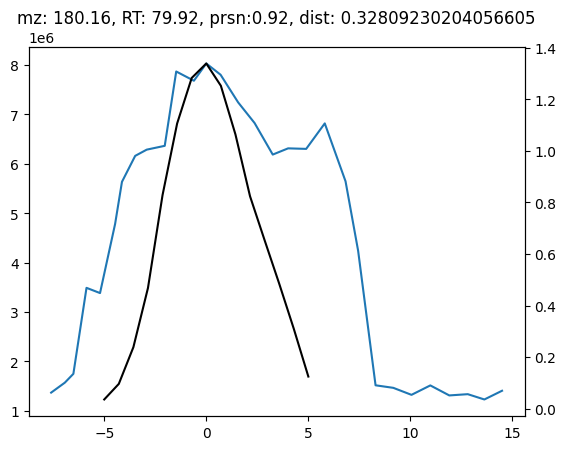

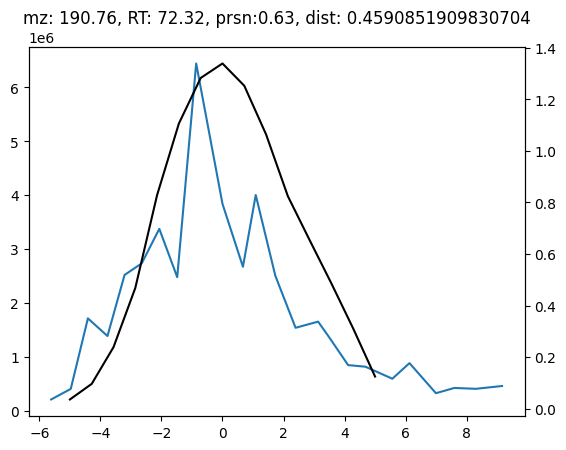

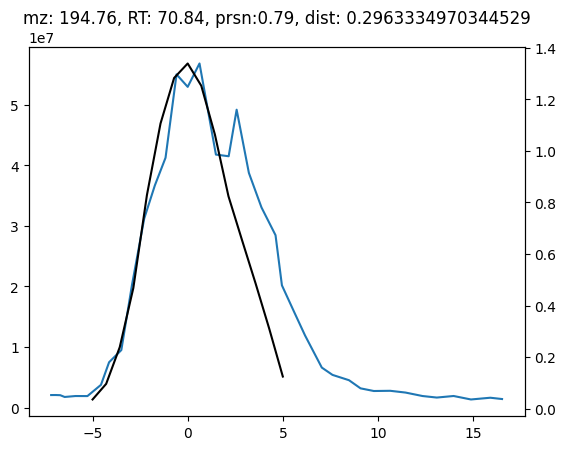

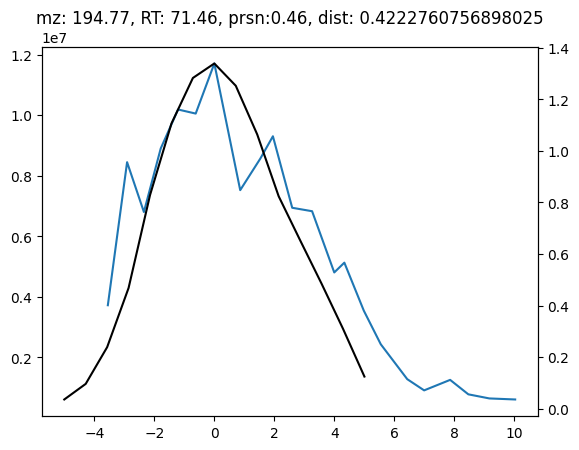

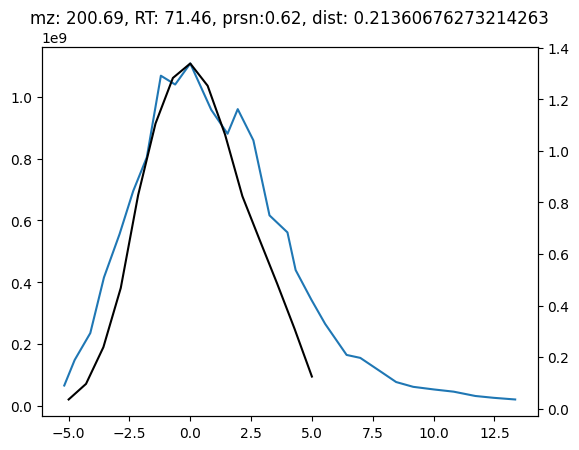

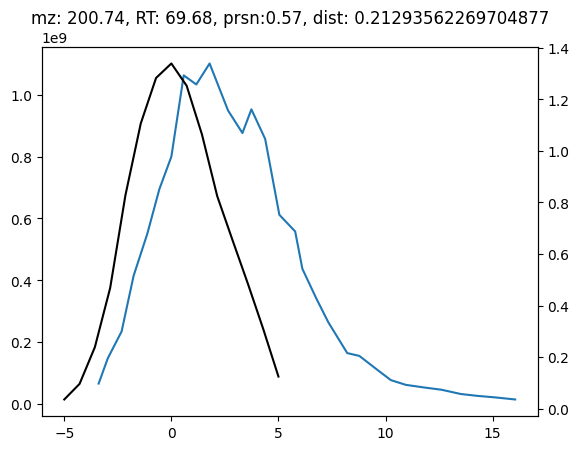

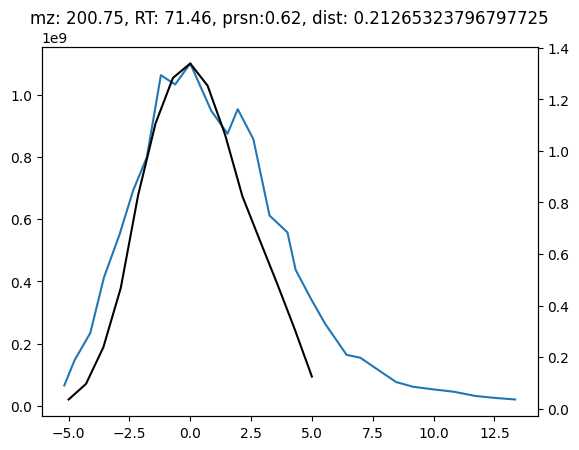

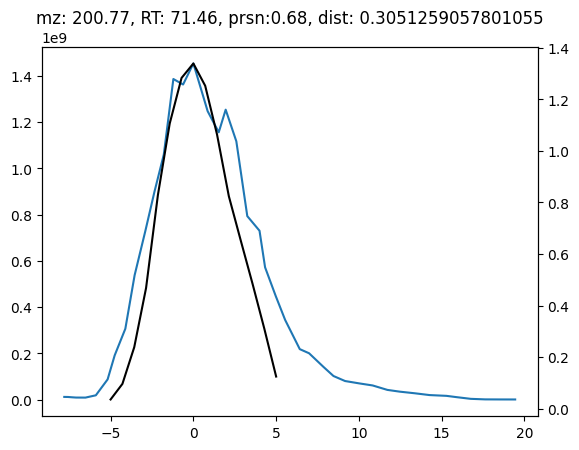

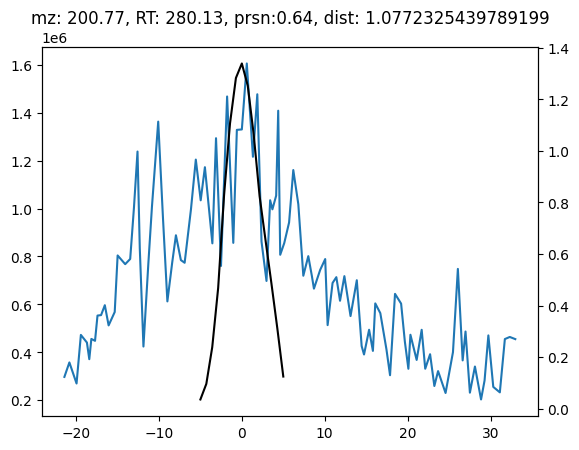

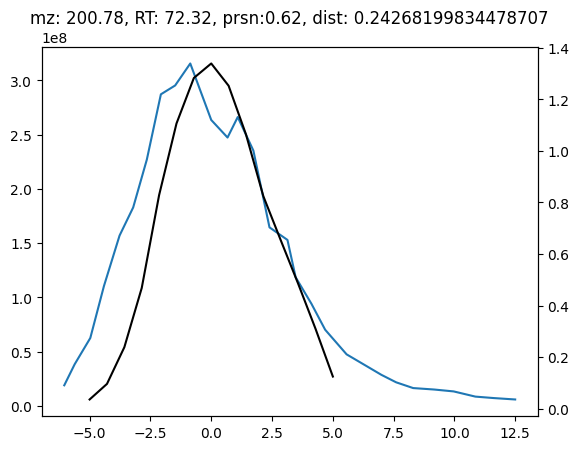

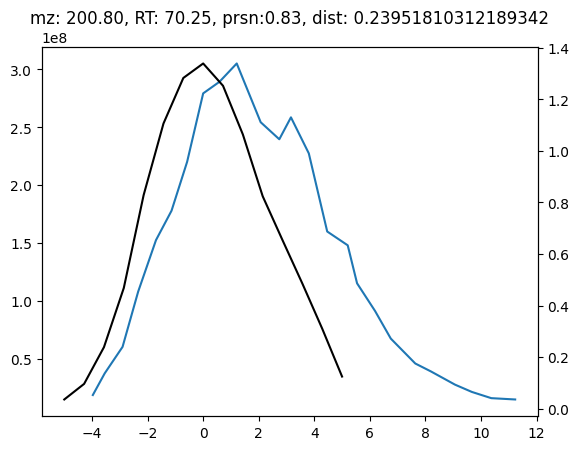

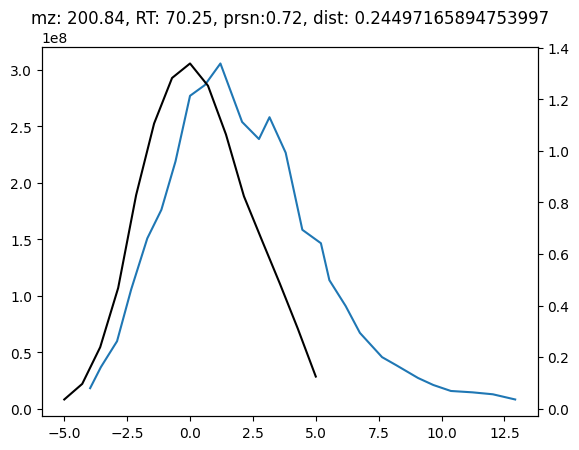

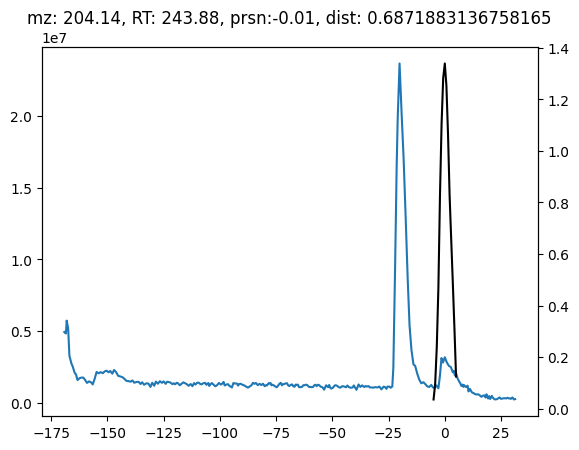

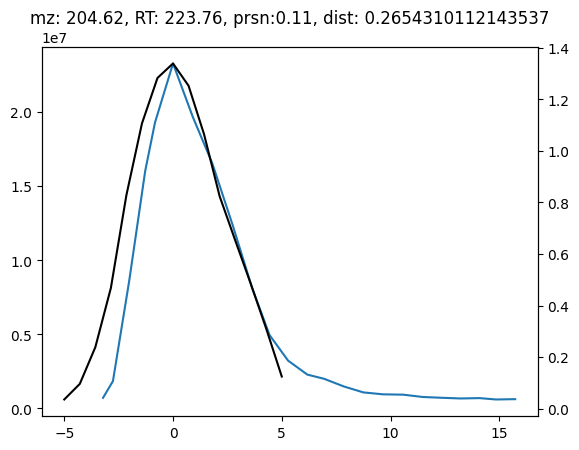

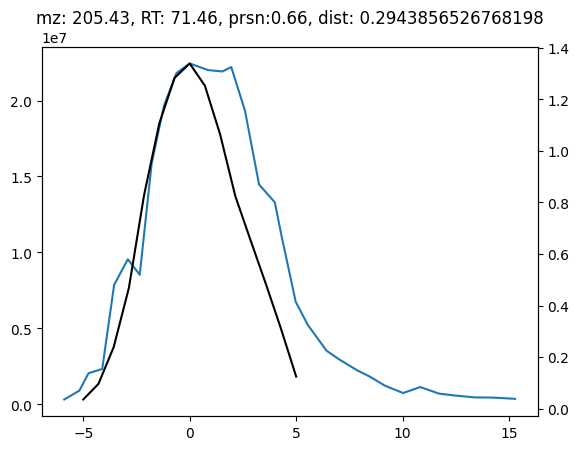

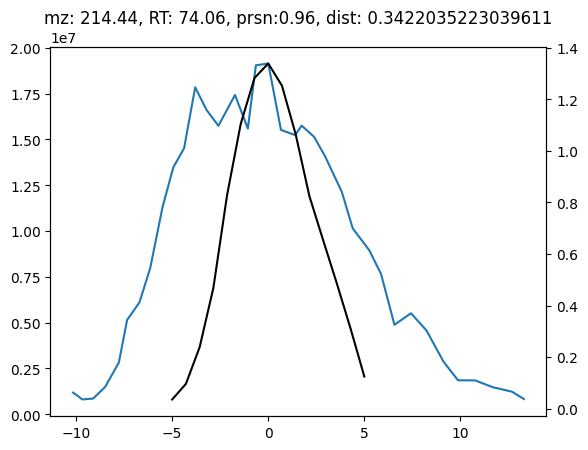

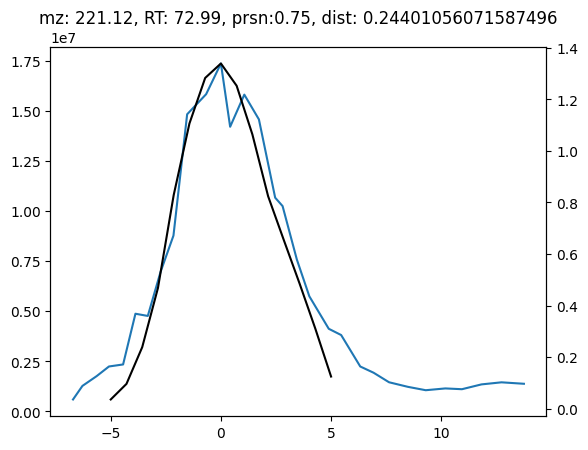

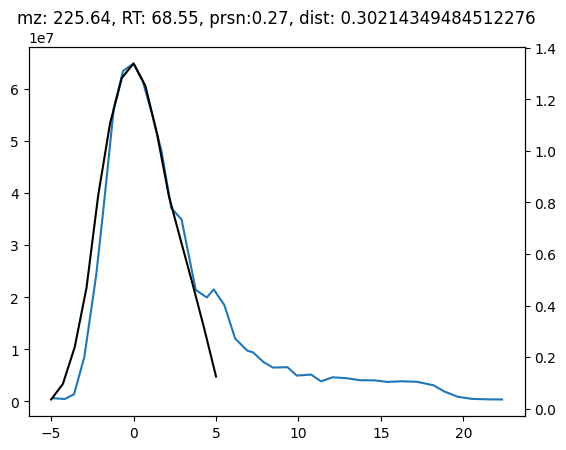

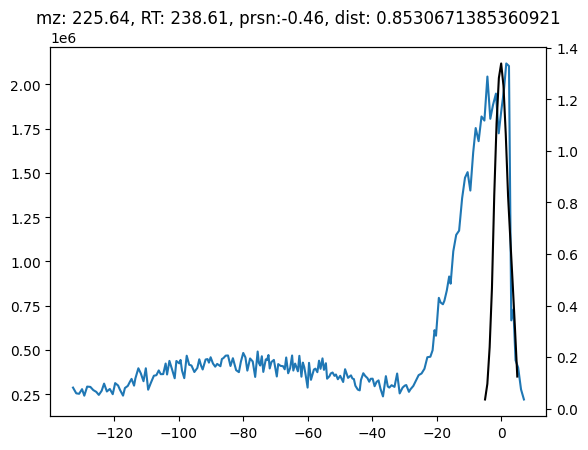

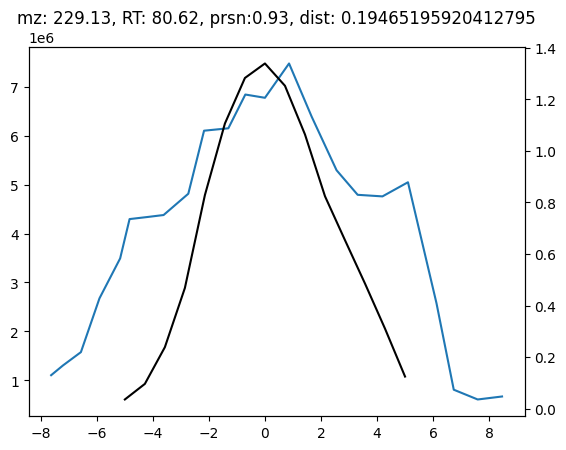

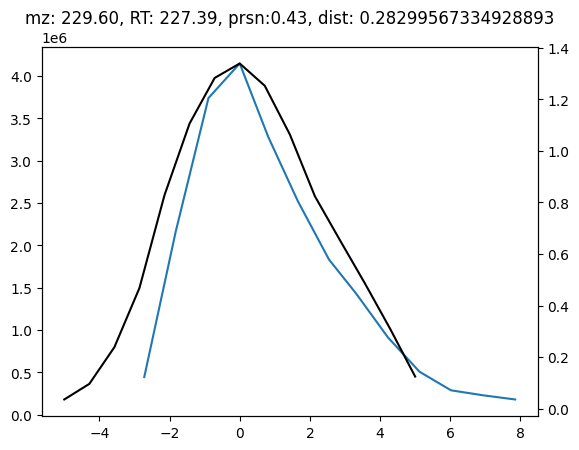

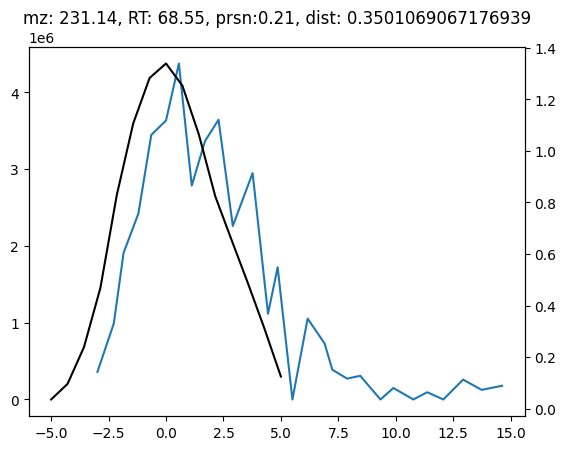

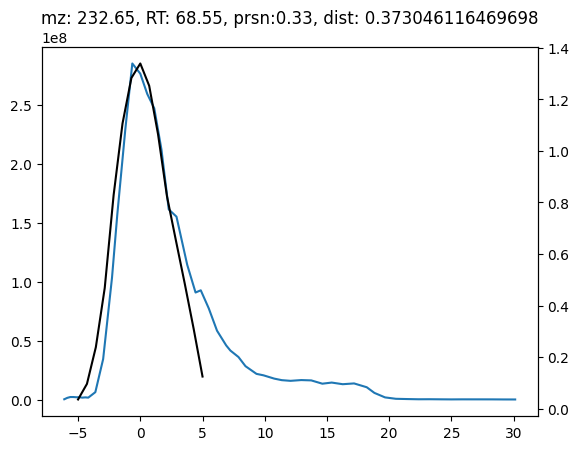

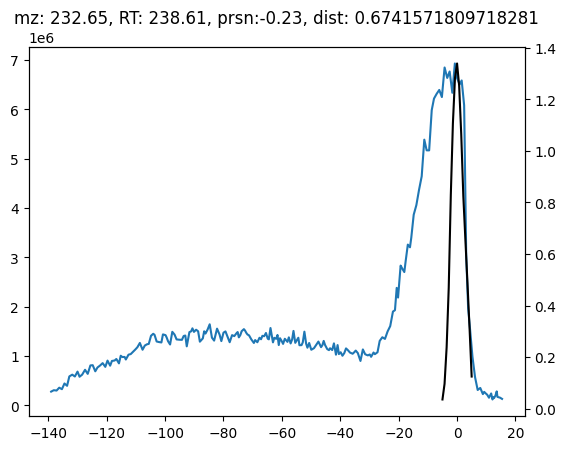

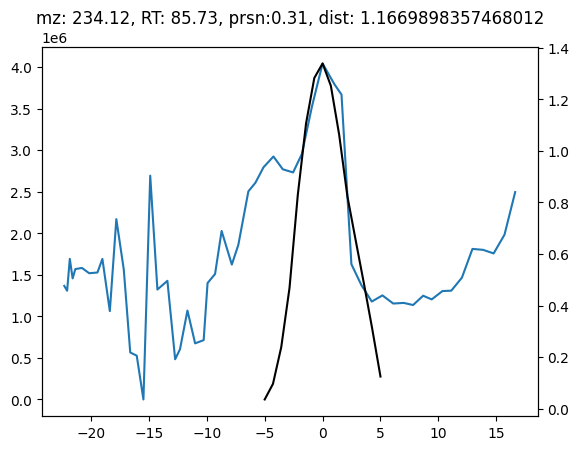

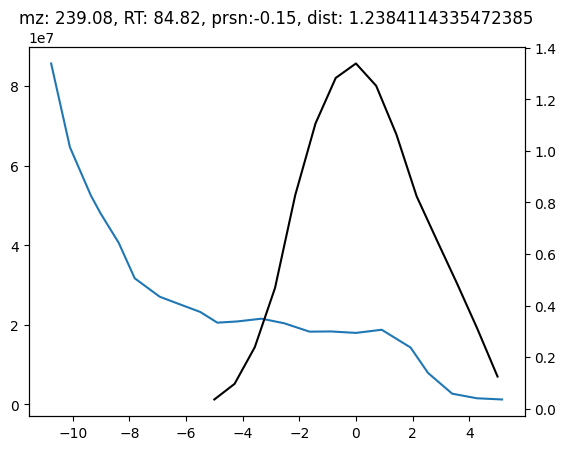

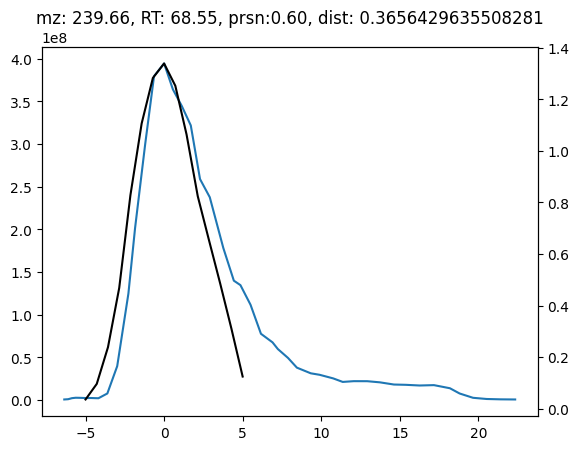

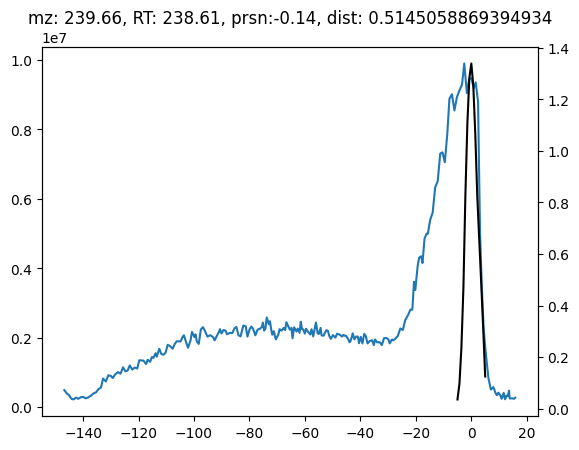

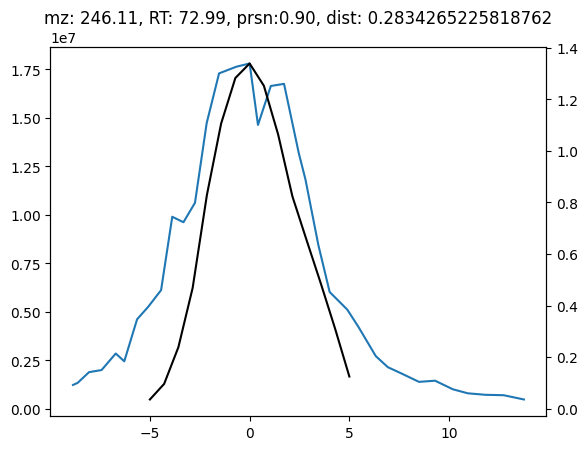

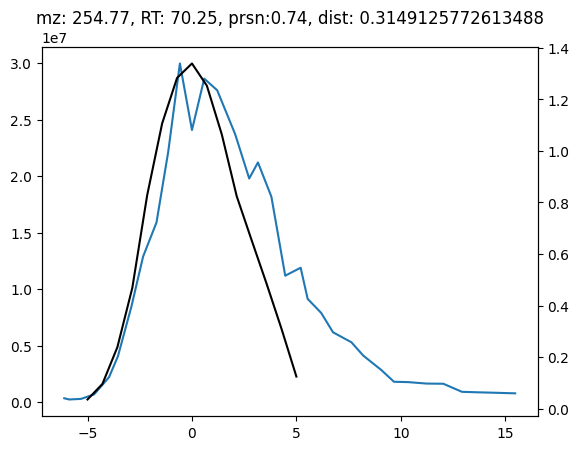

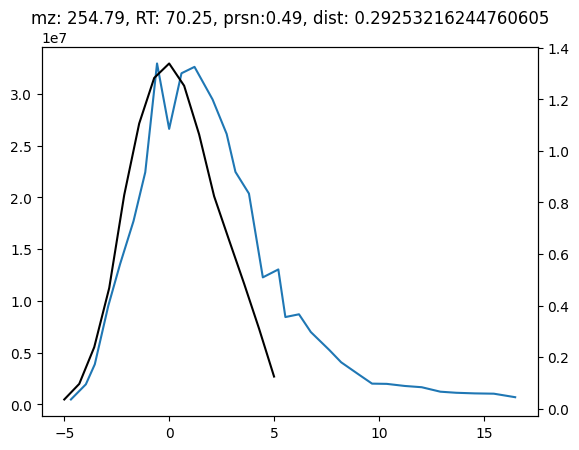

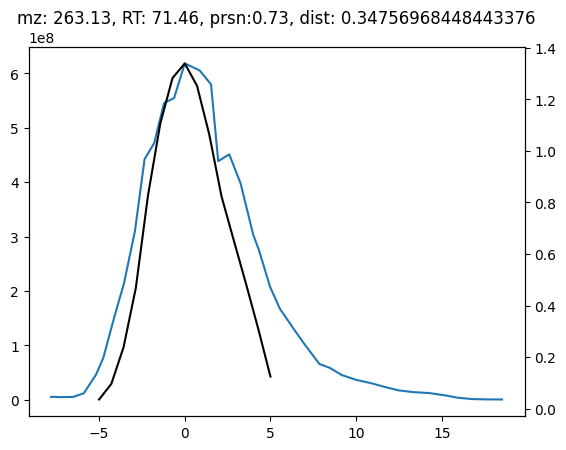

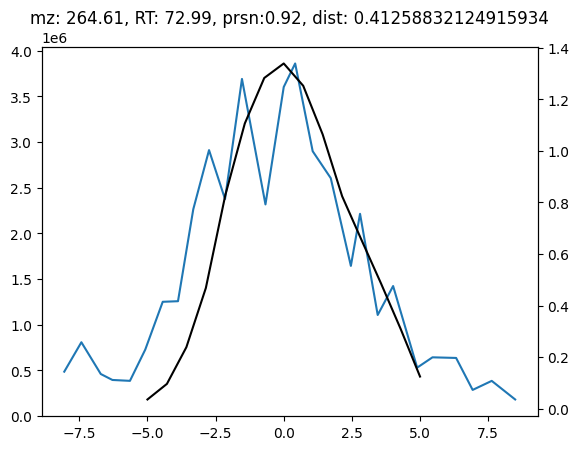

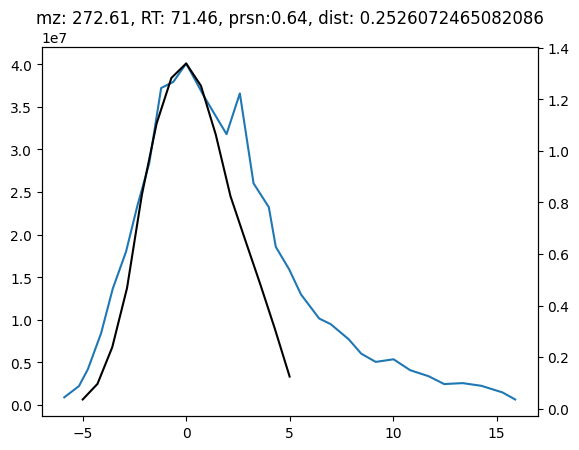

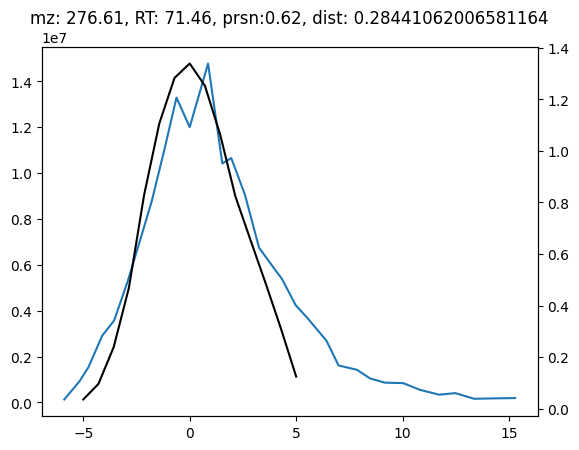

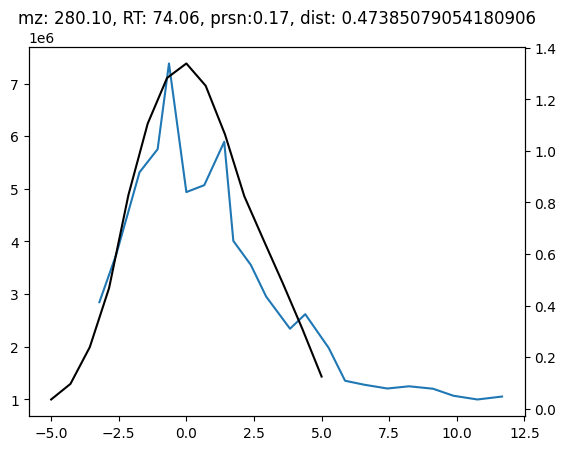

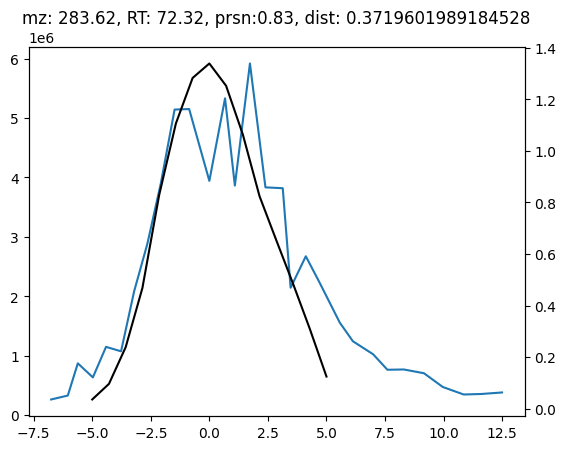

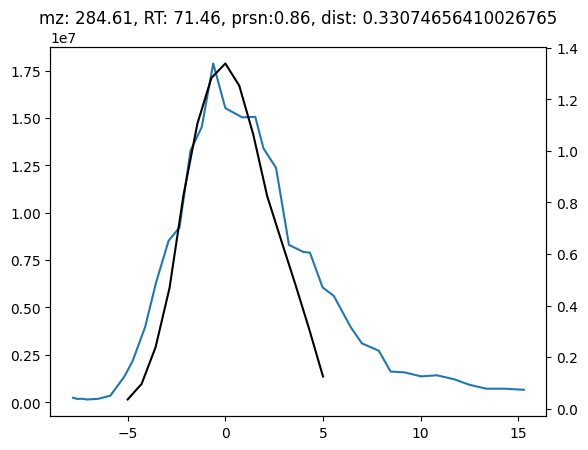

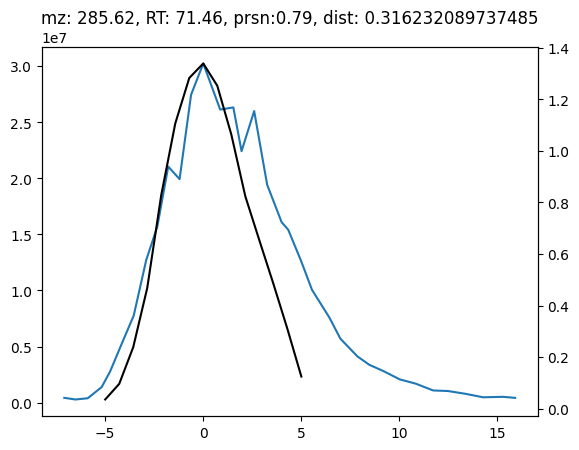

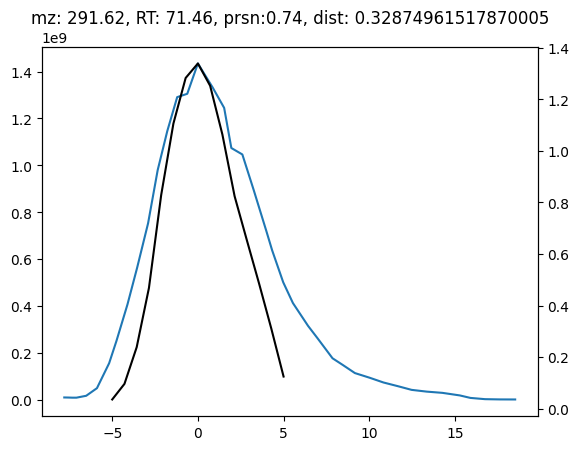

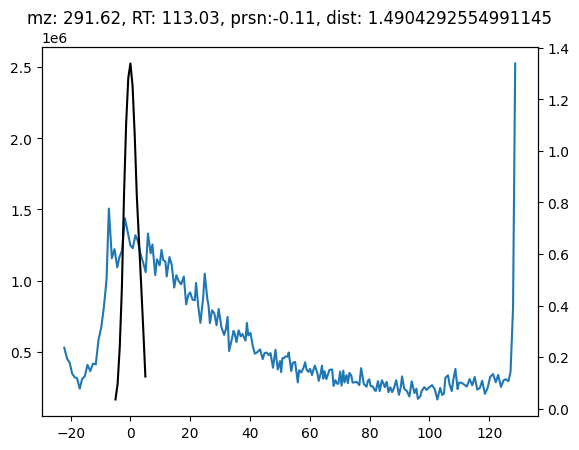

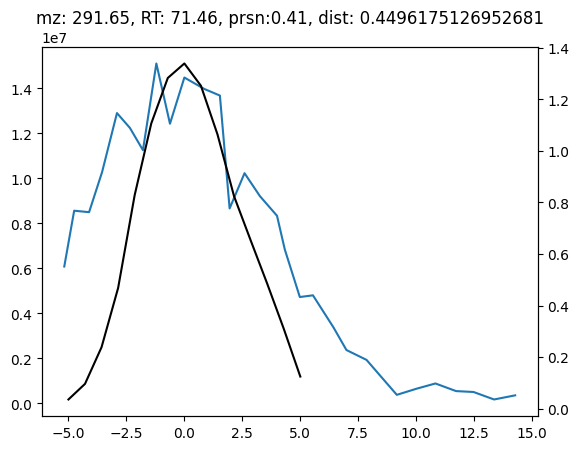

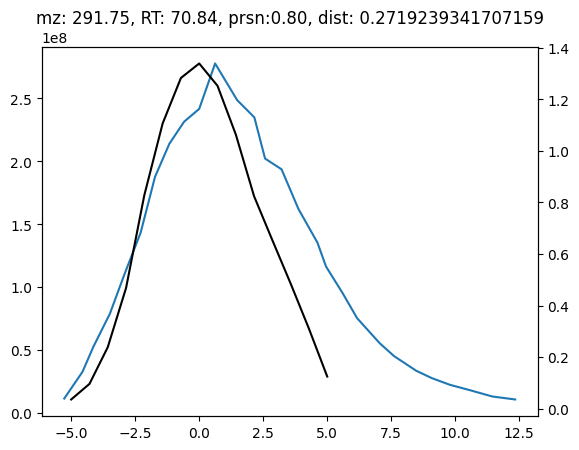

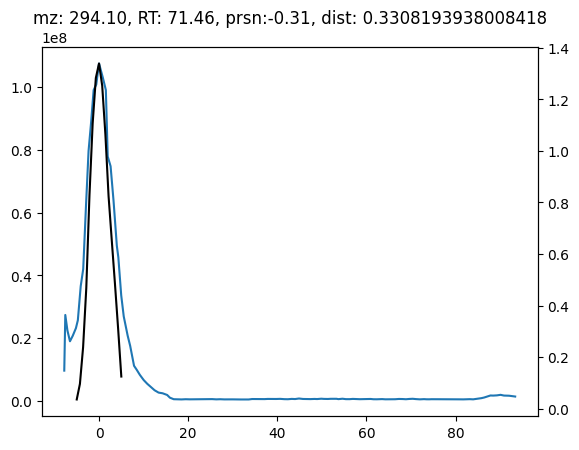

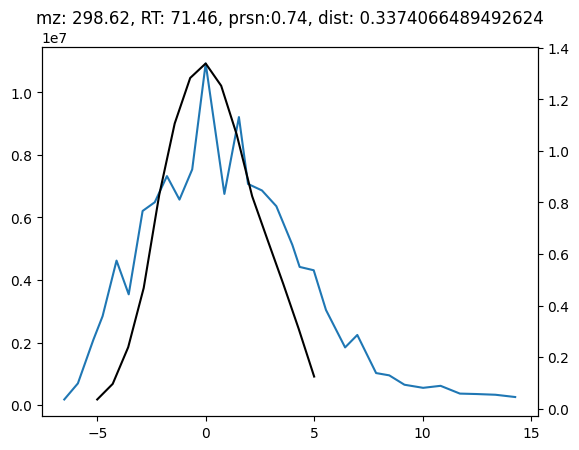

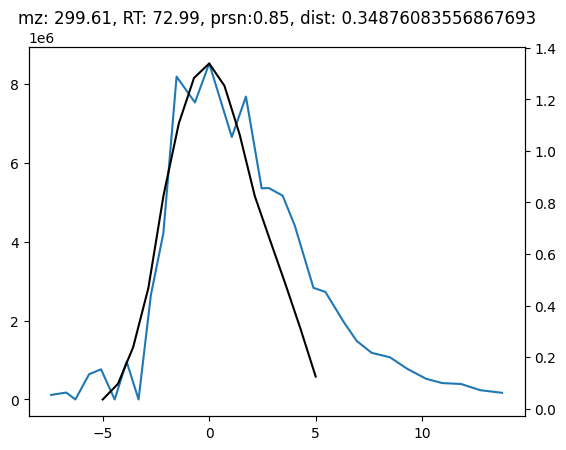

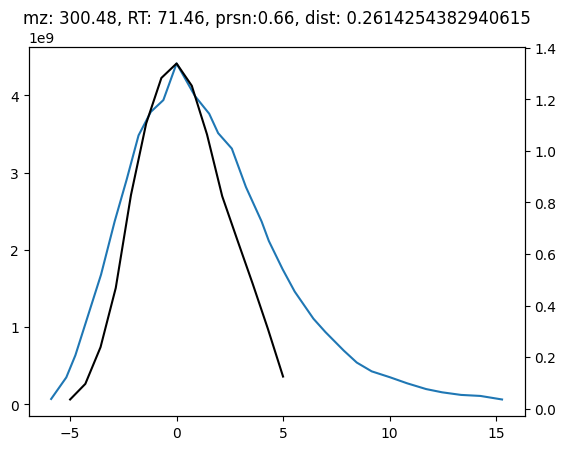

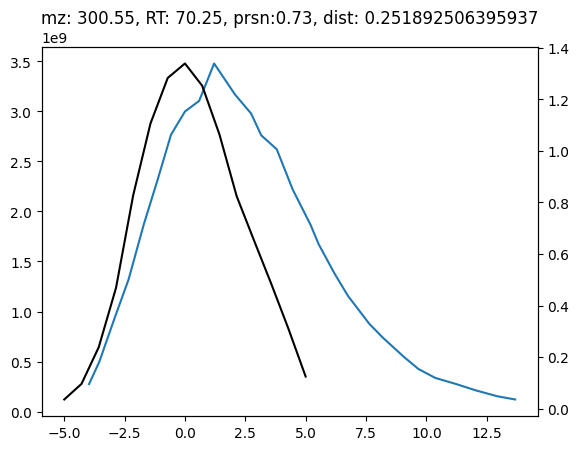

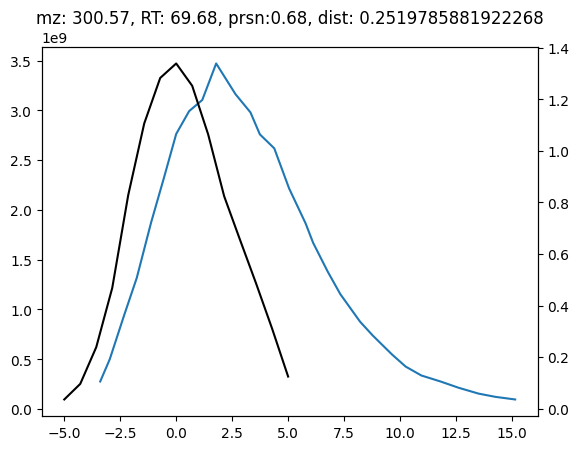

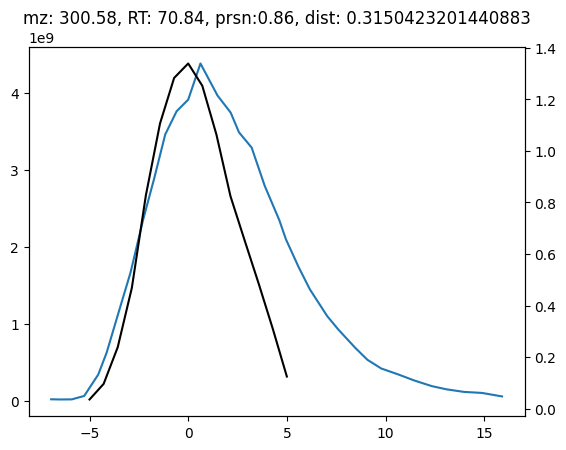

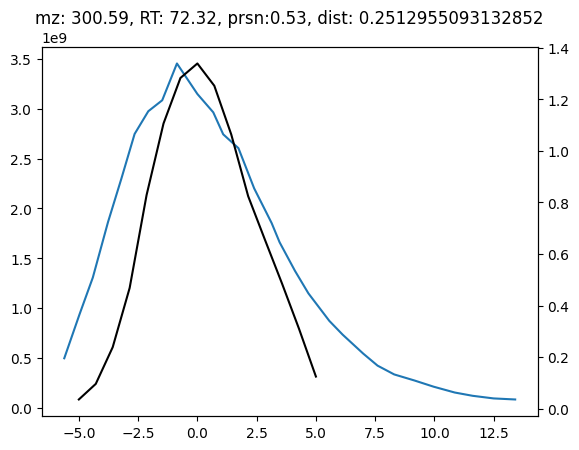

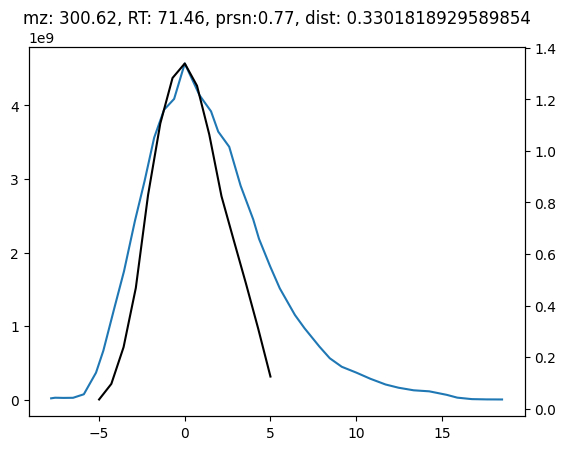

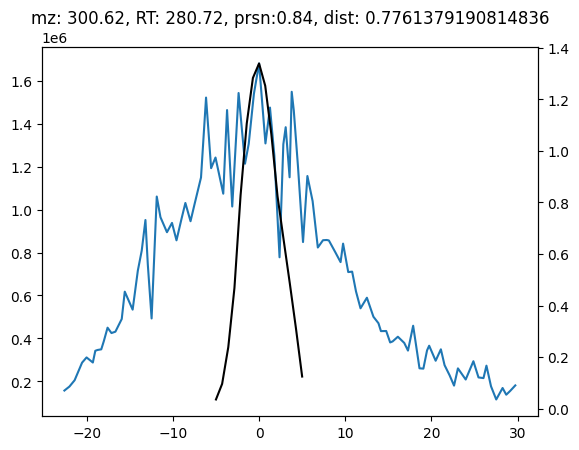

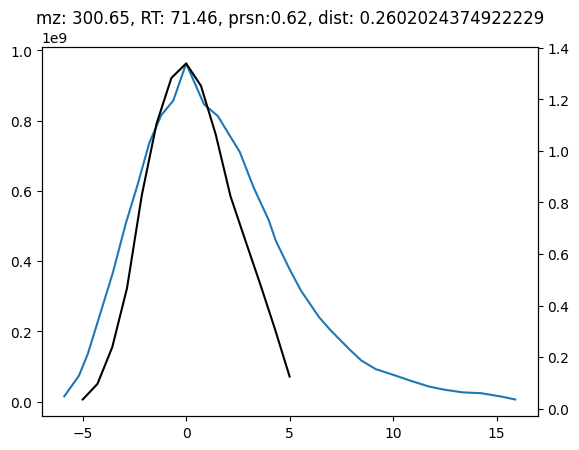

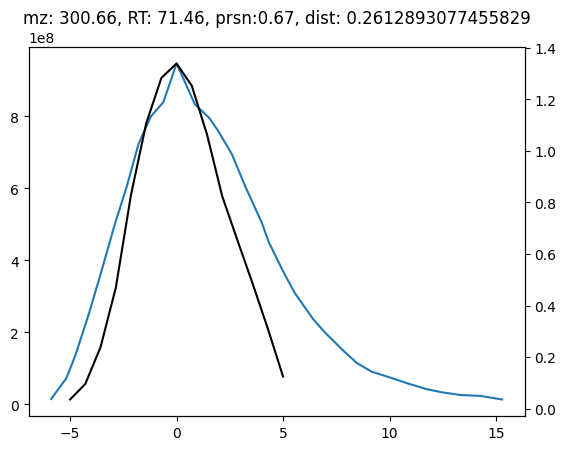

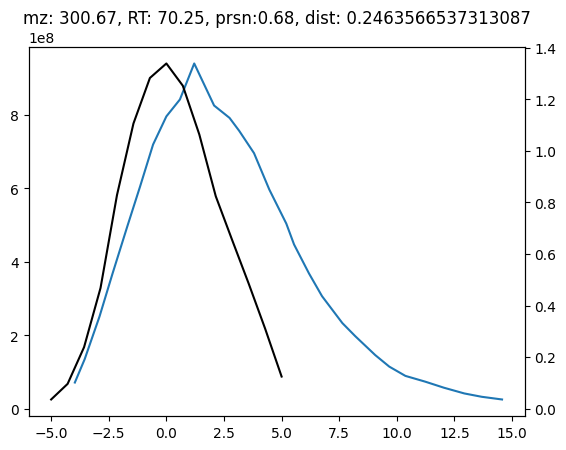

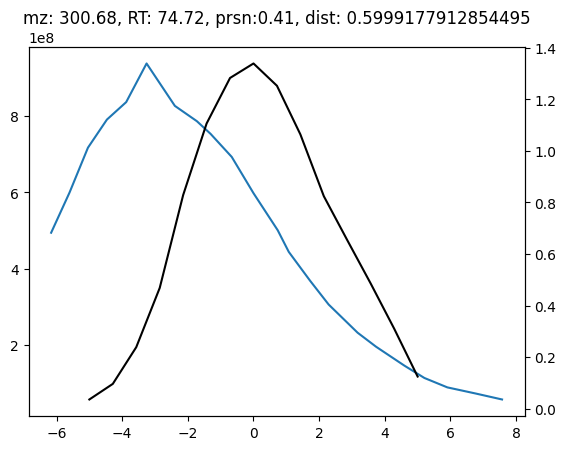

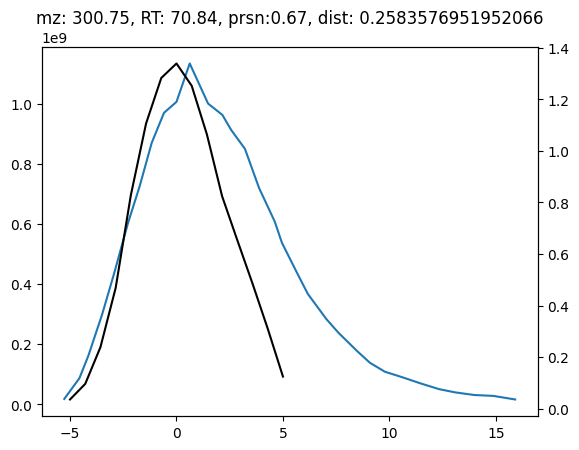

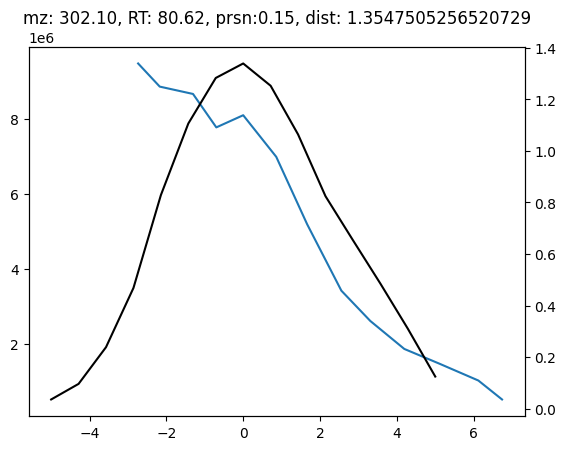

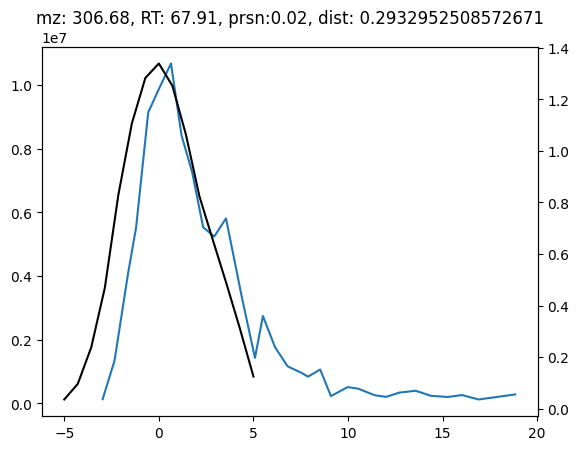

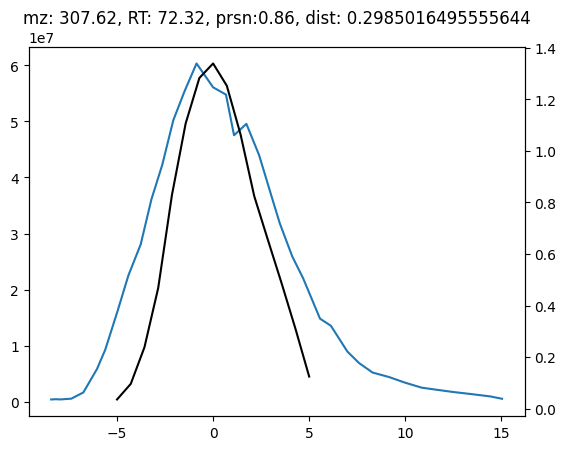

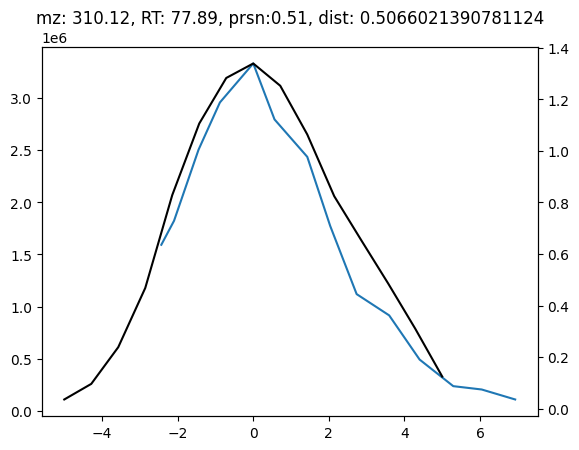

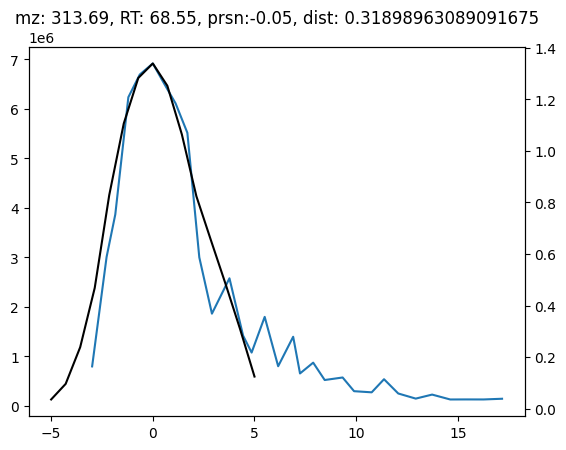

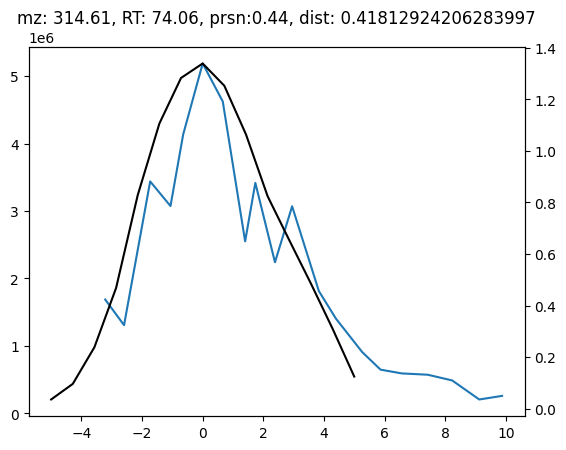

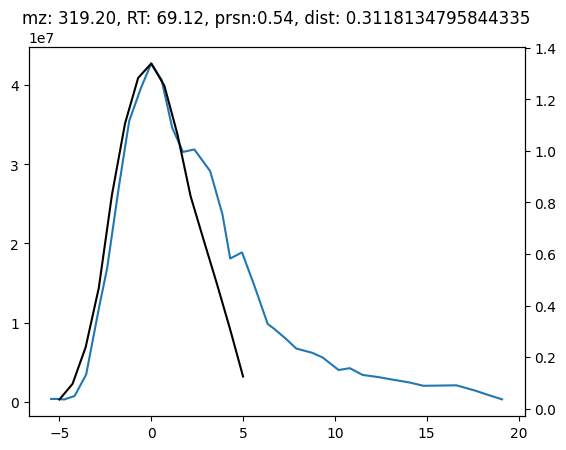

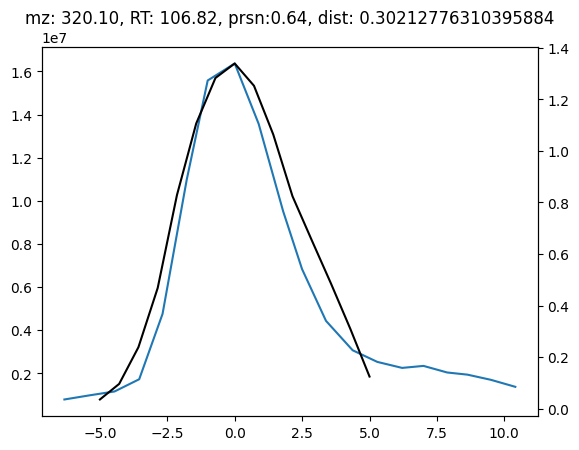

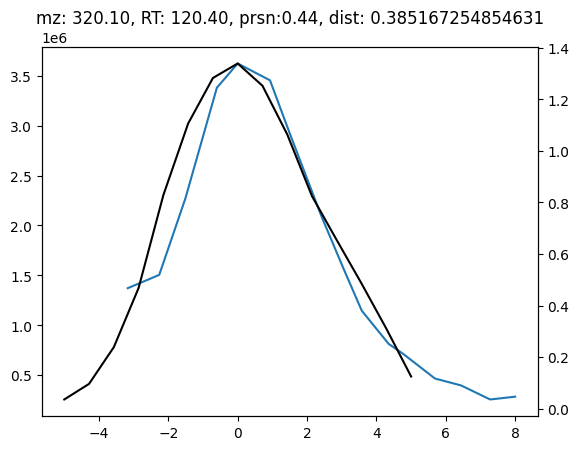

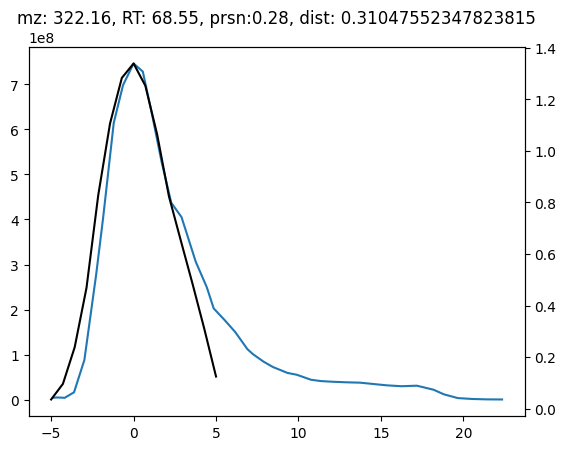

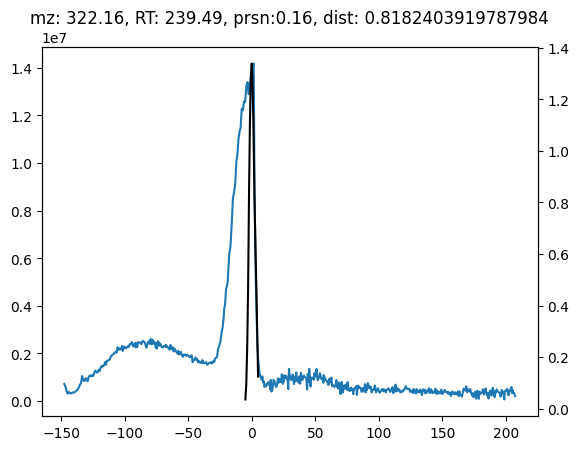

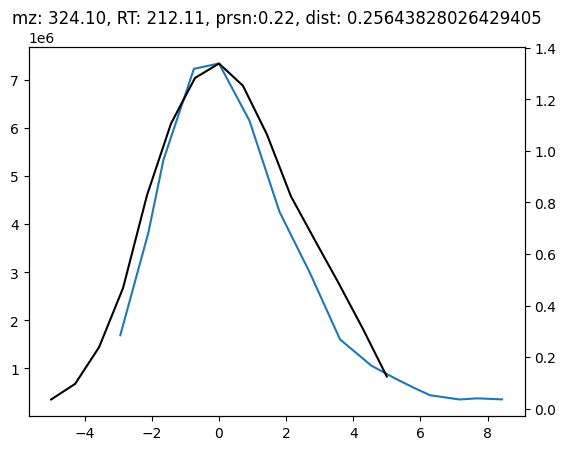

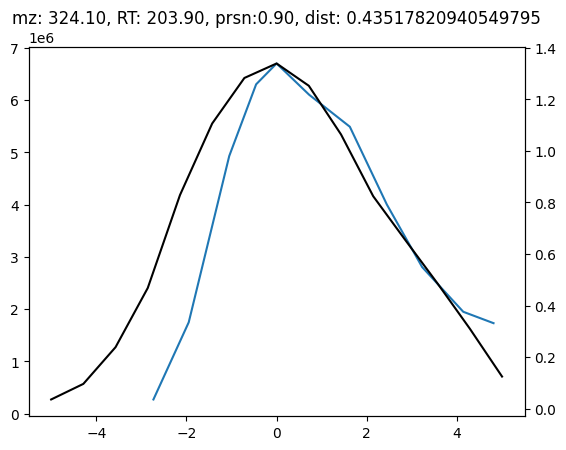

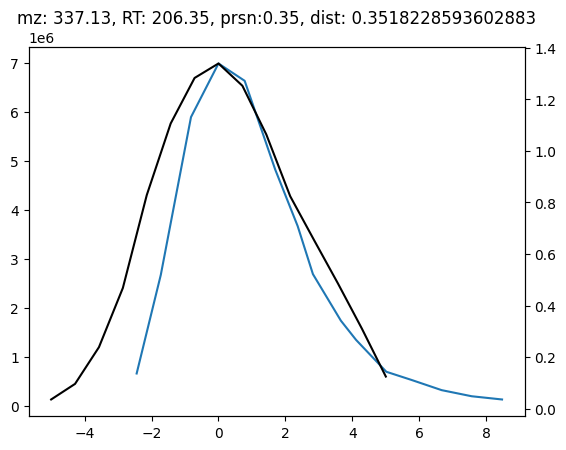

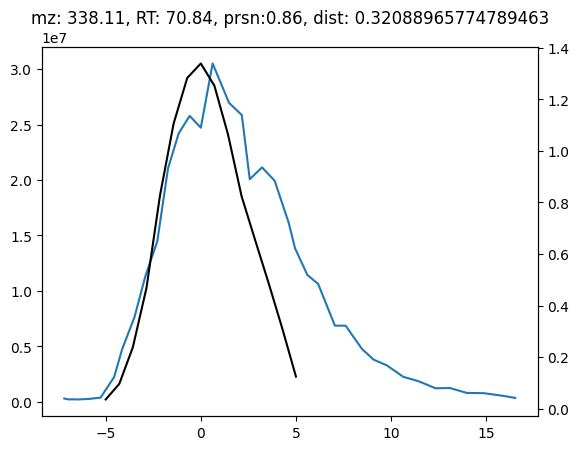

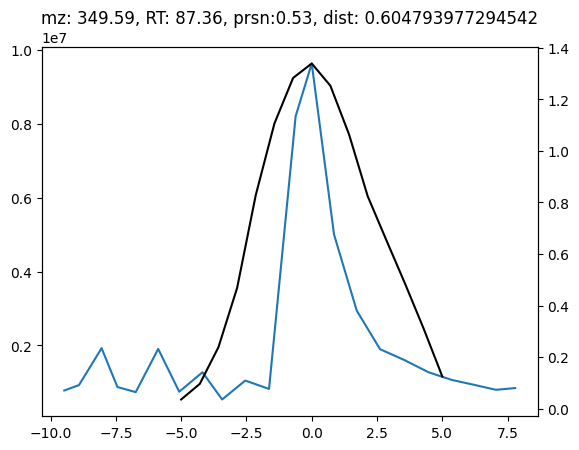

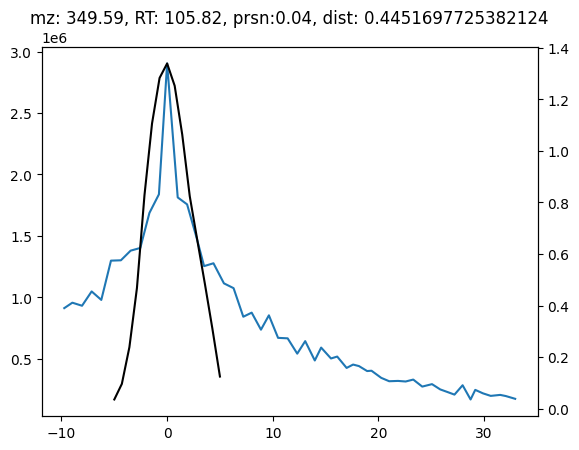

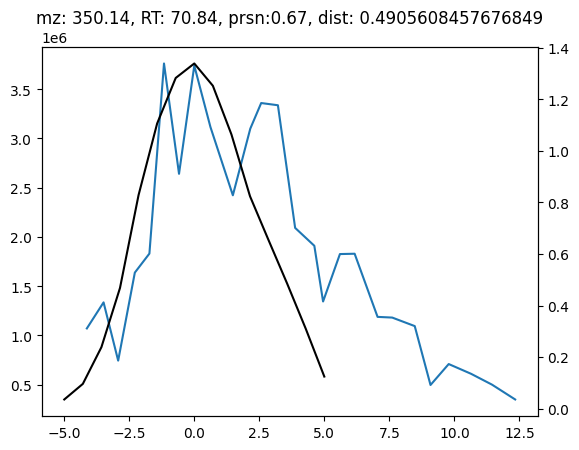

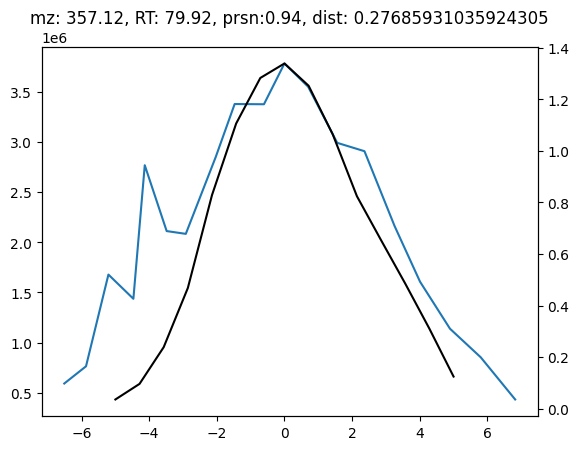

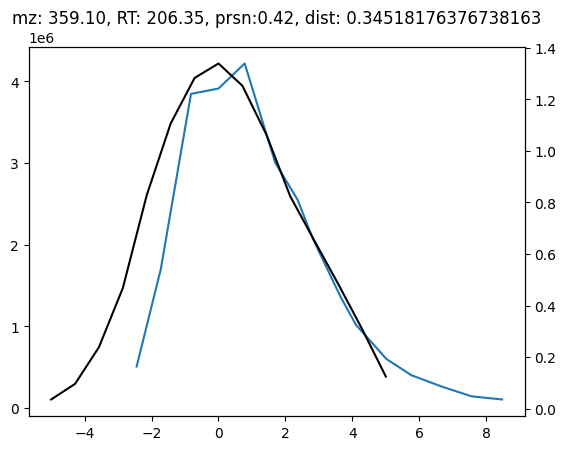

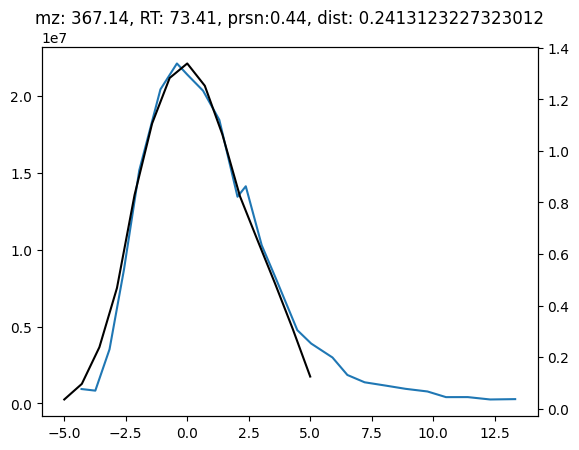

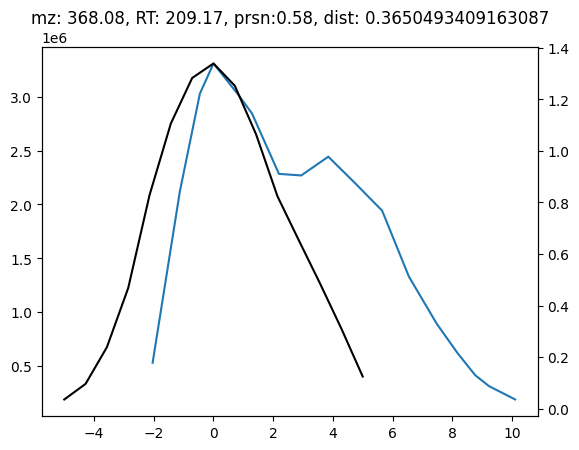

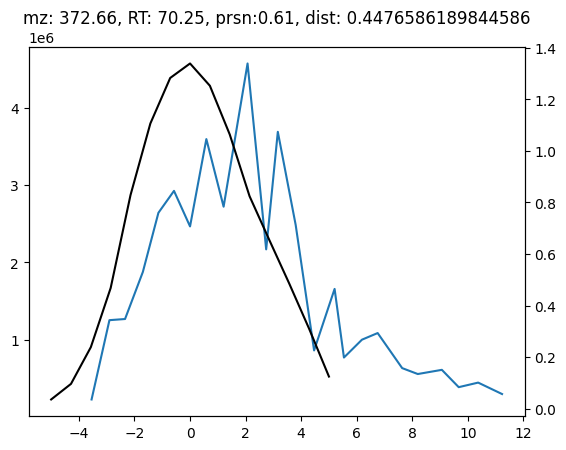

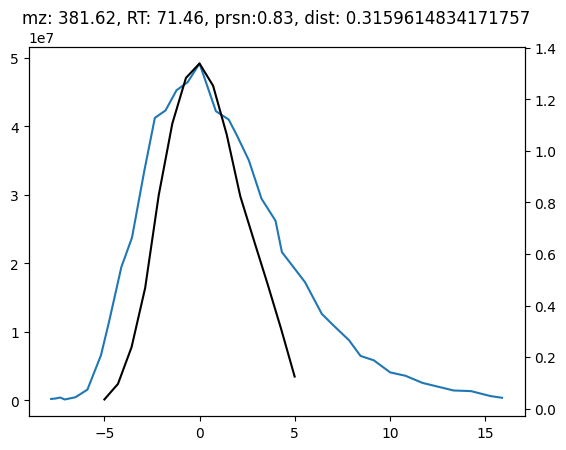

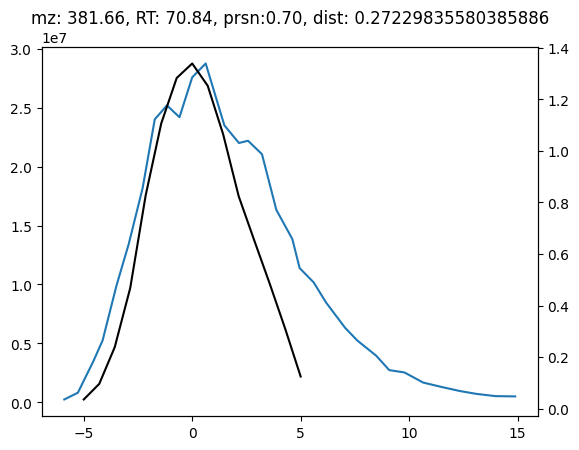

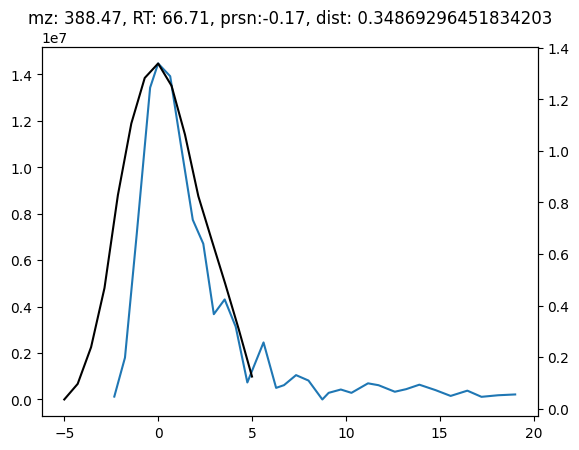

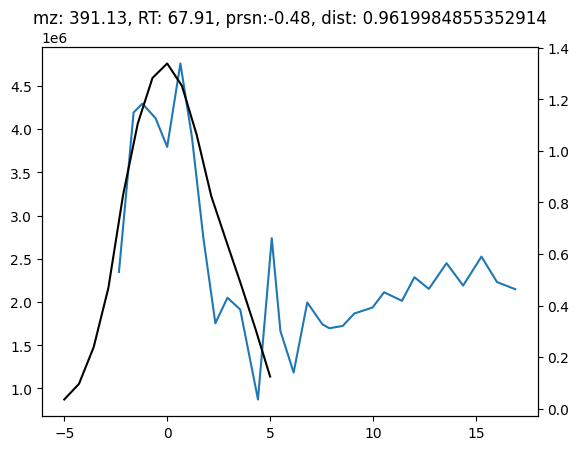

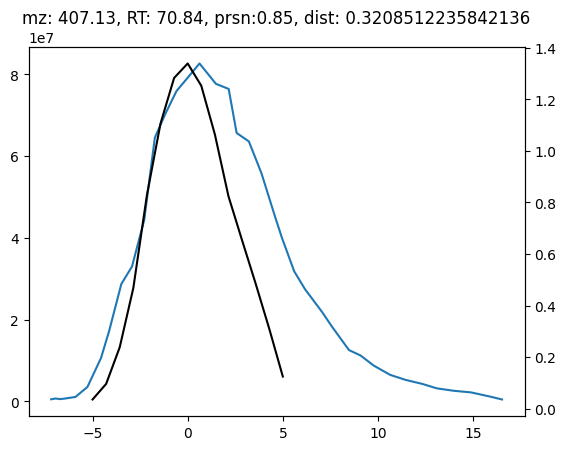

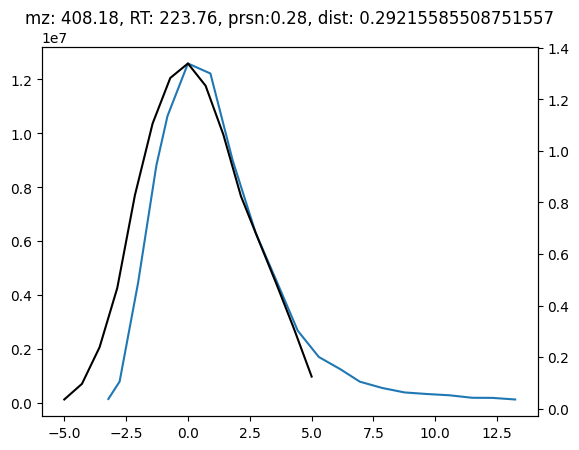

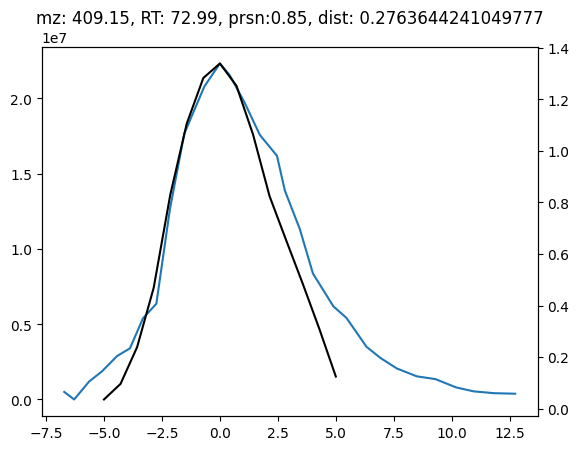

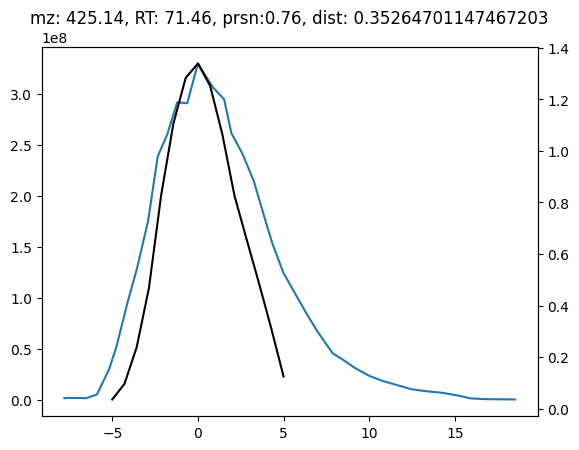

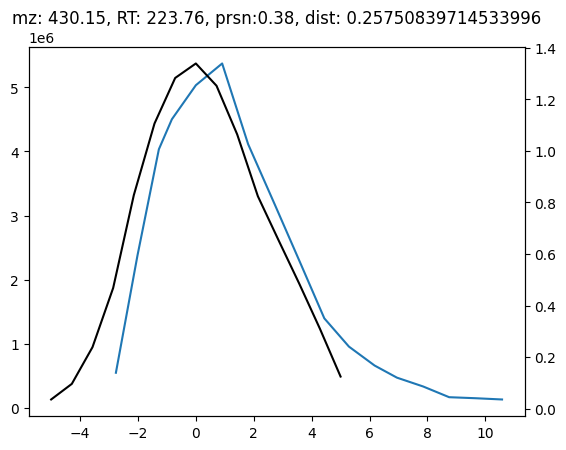

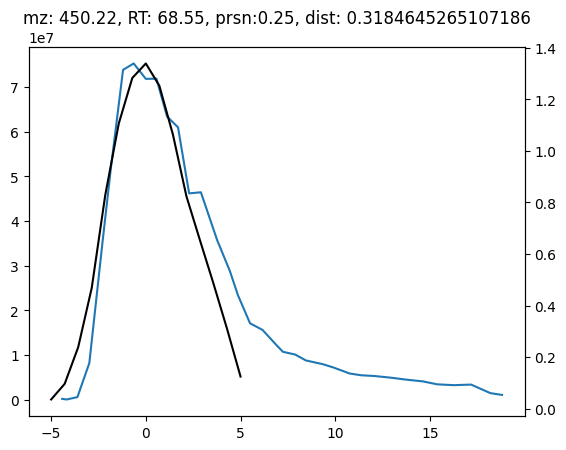

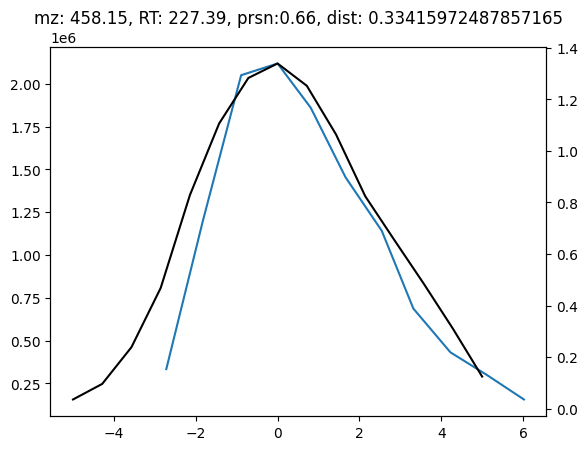

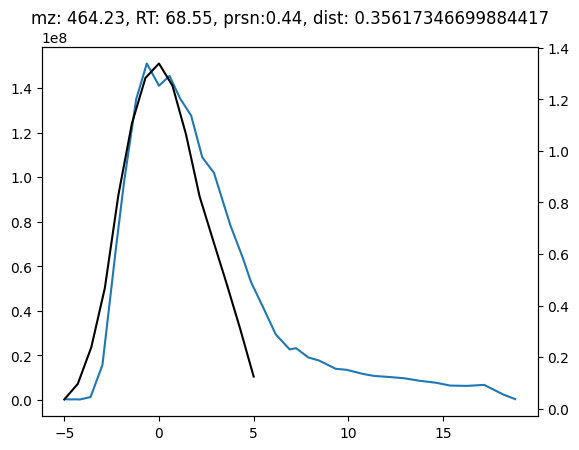

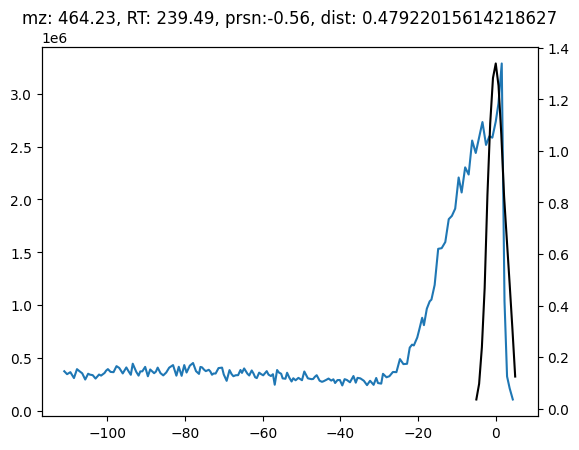

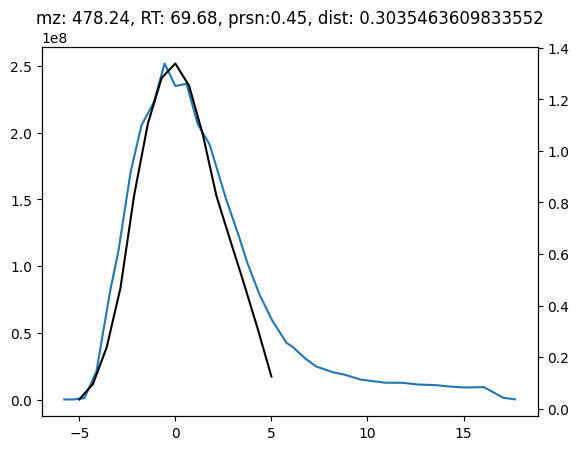

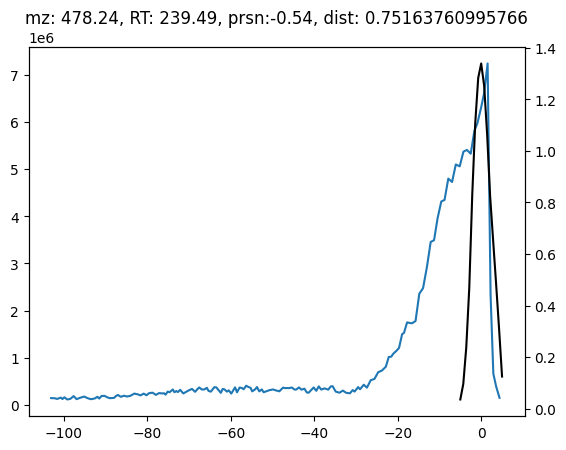

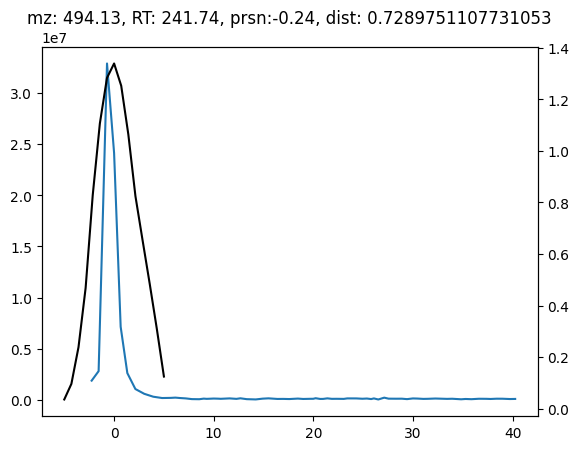

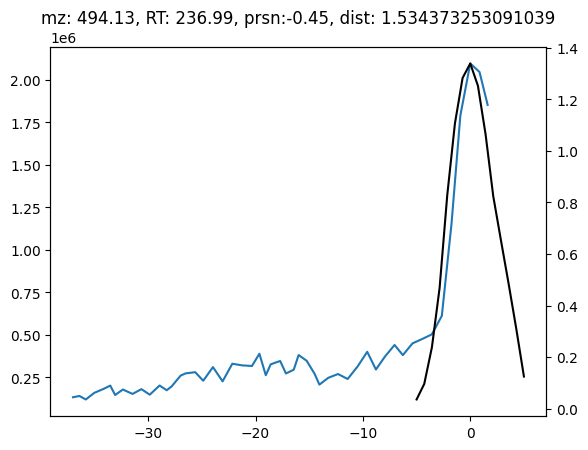

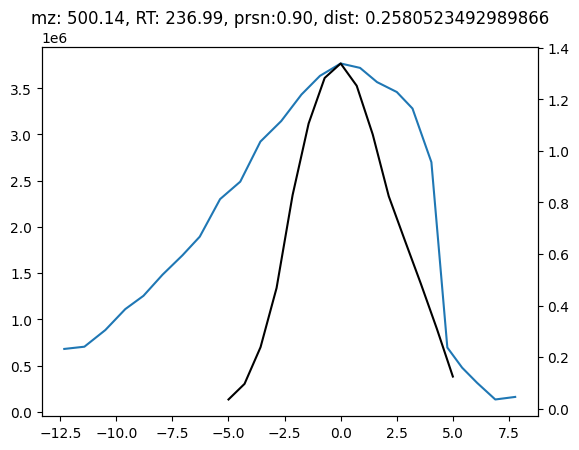

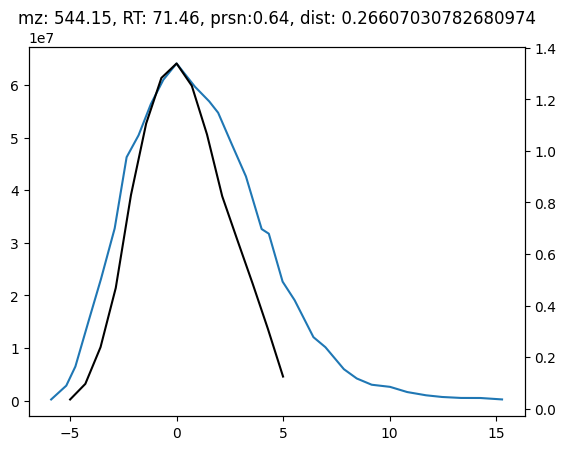

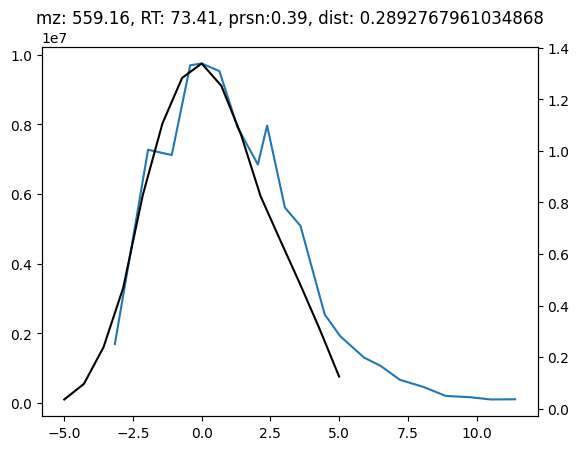

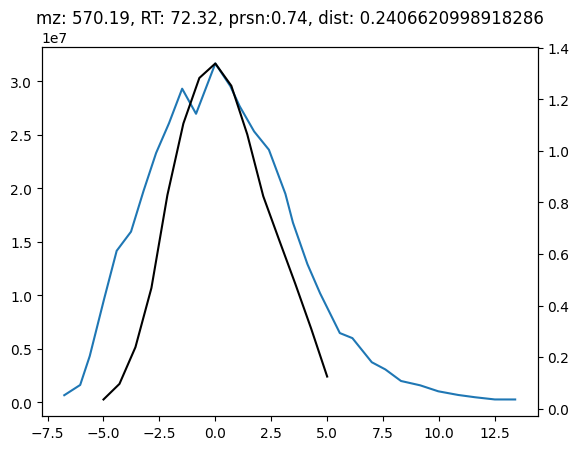

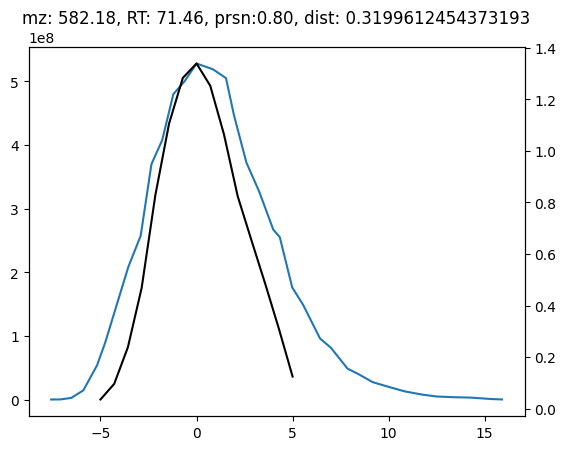

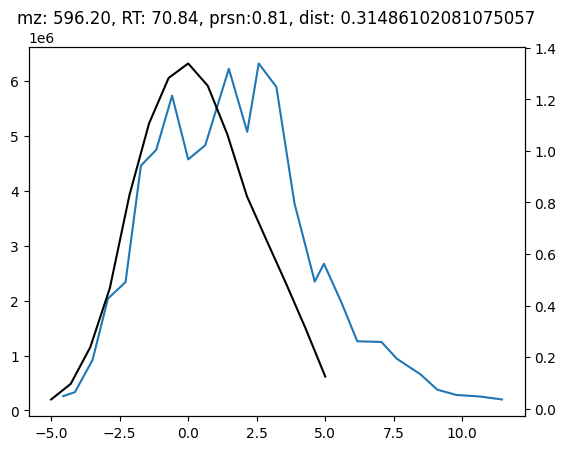

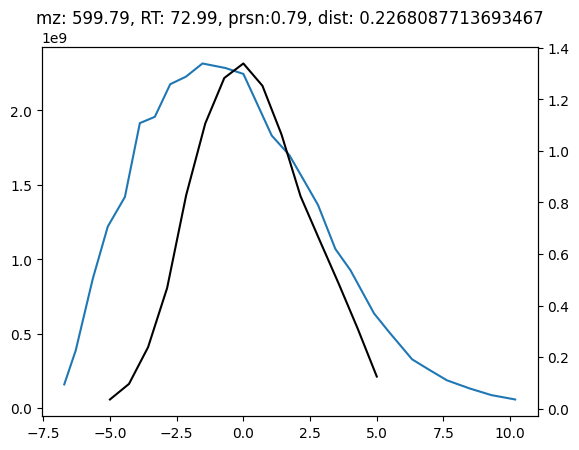

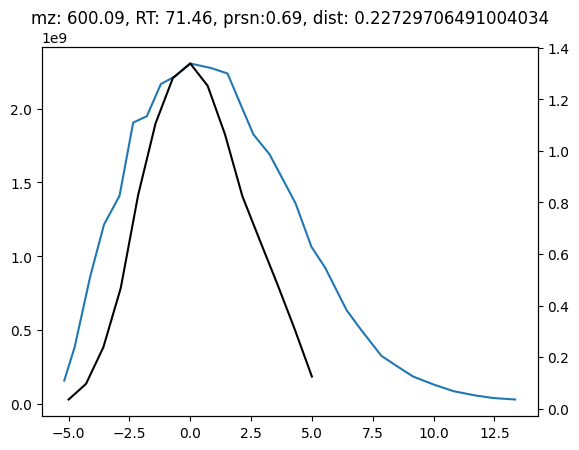

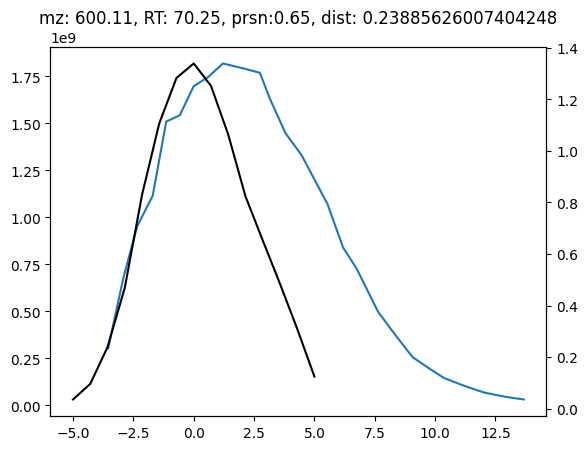

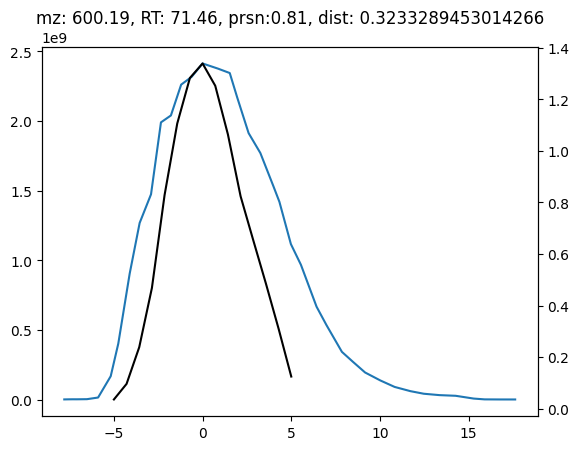

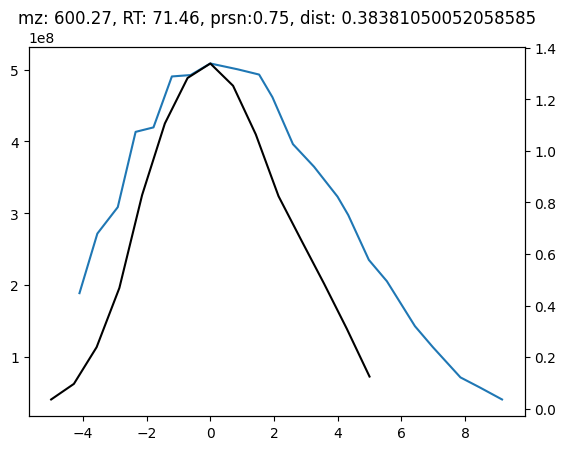

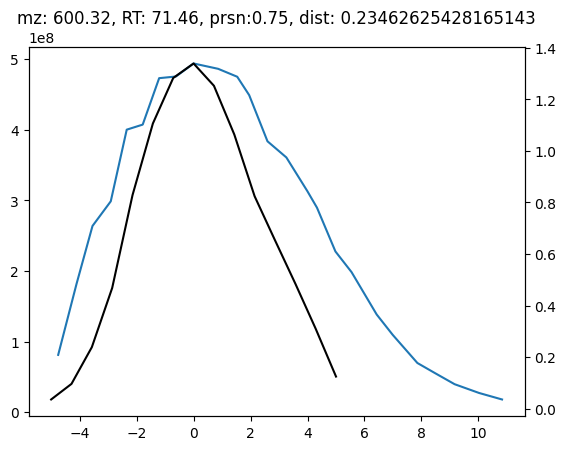

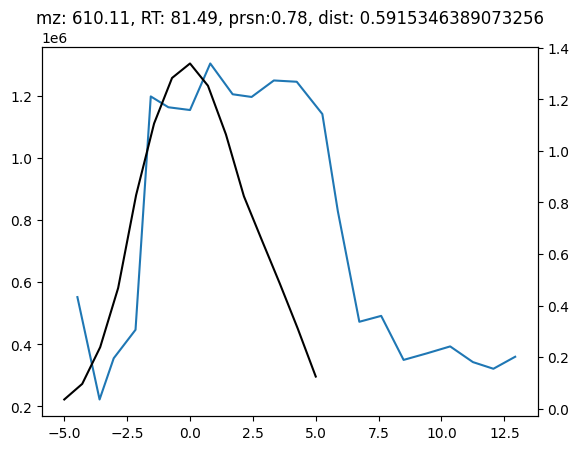

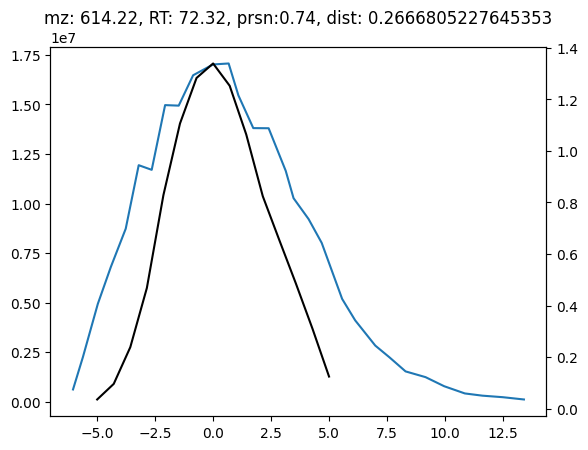

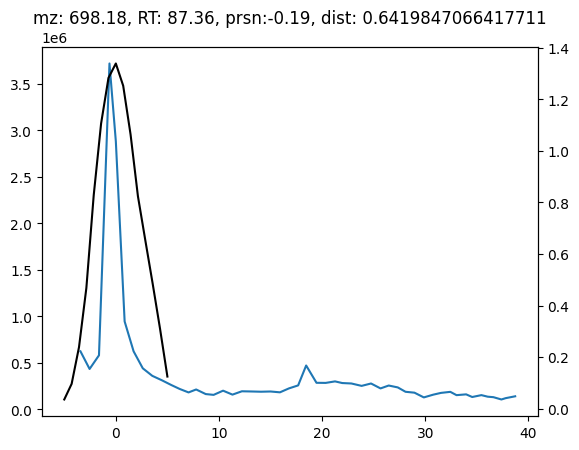

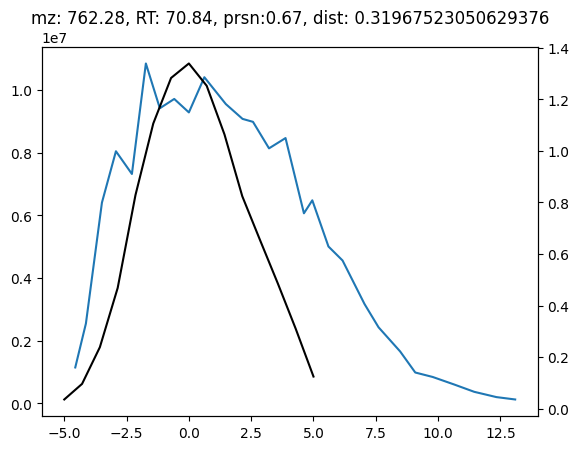

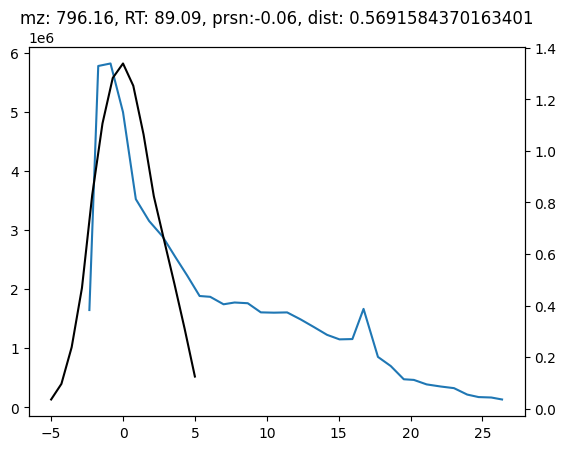

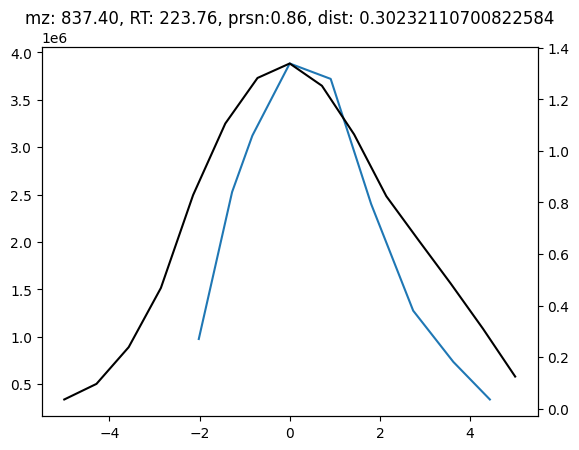

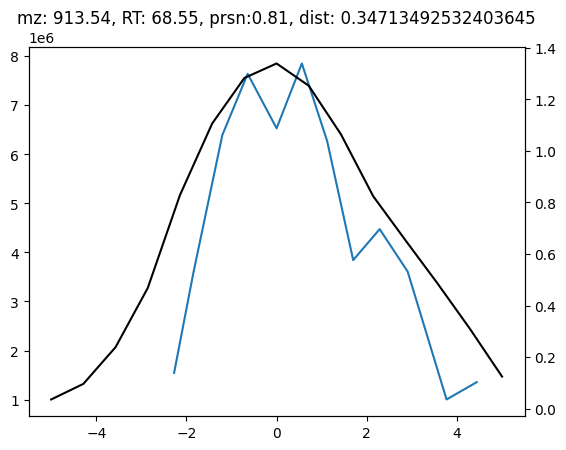

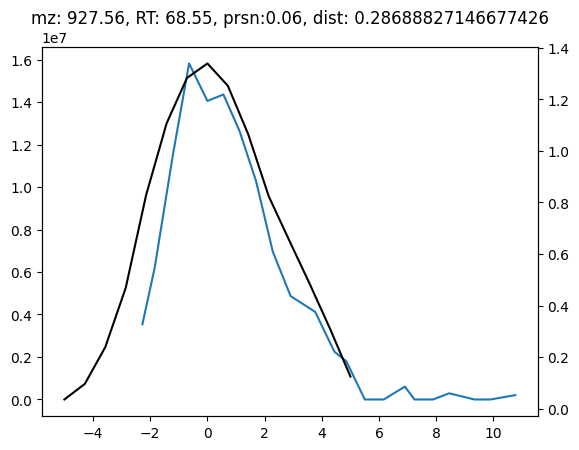

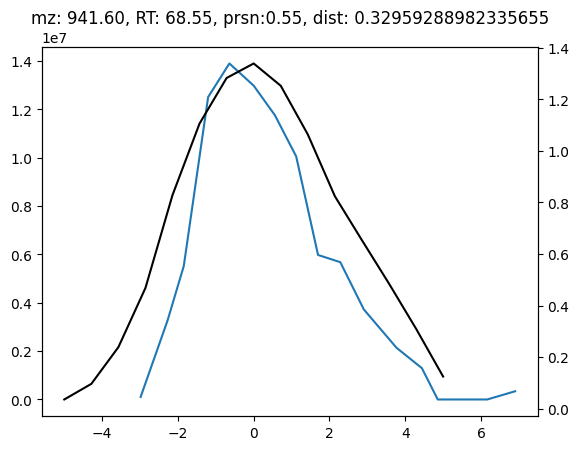

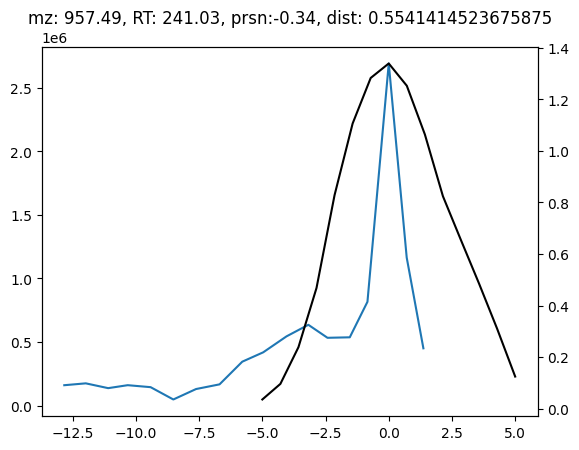

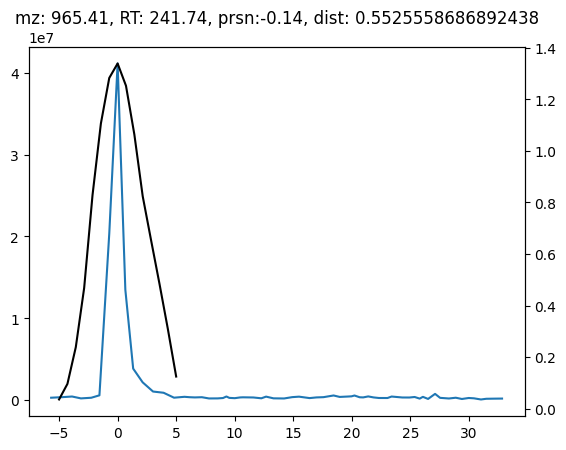

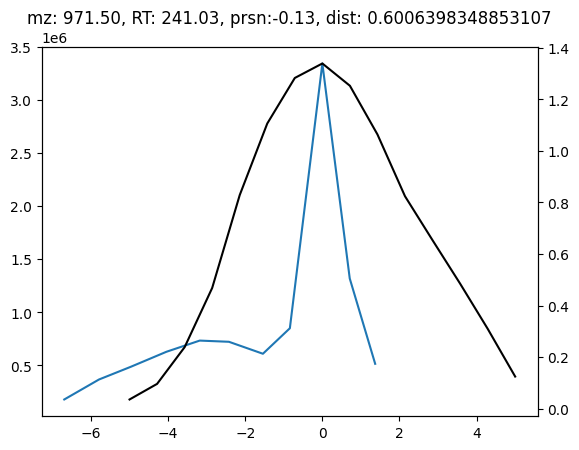

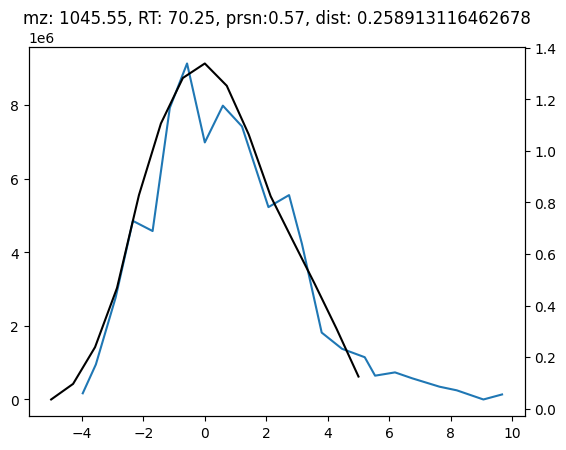

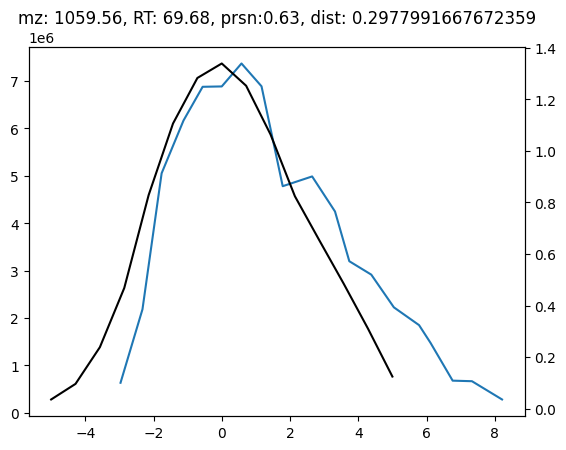

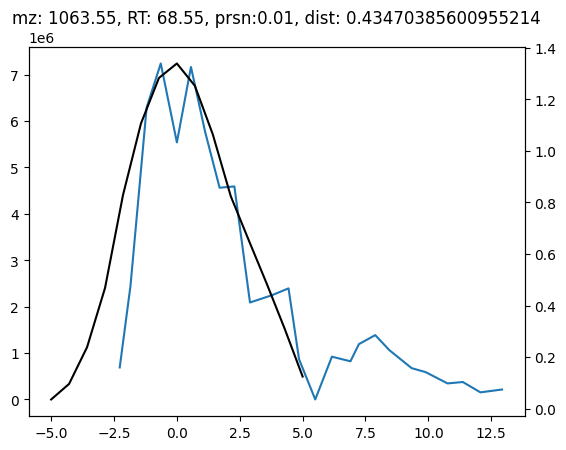

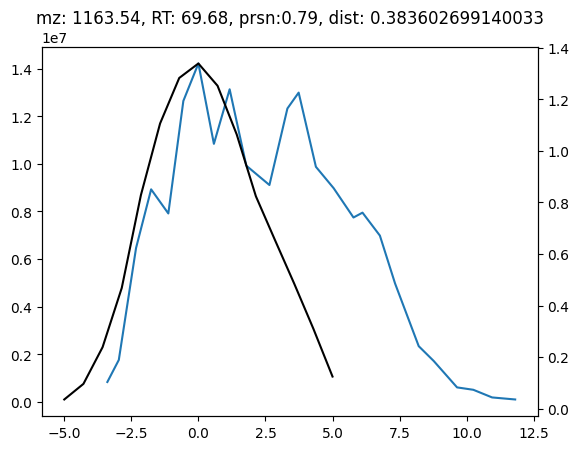

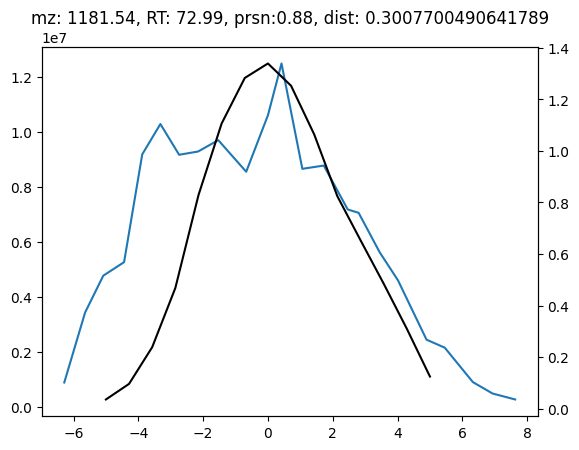

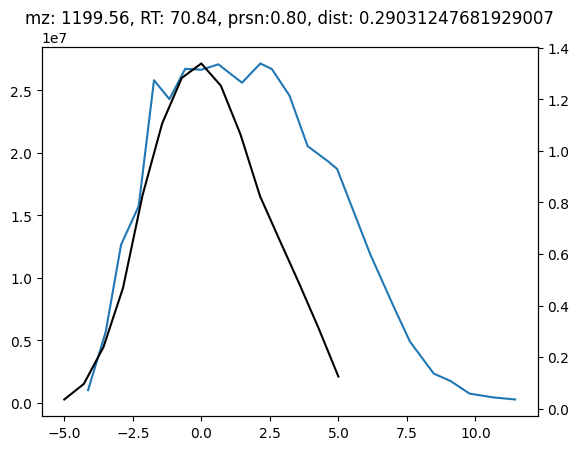

In [11]:
for i,df in xics.items():
    fig,ax=plt.subplots()
    ax.plot(df.rt-ft.loc[i,"RT"],df.int)
    ax2=ax.twinx()
    ax2.plot(interpAP["RT"]-aft.loc[7,"RT"],interpAP["Int"],c="k")

    ax.set(title=f"mz: {ft.loc[i,'mz']:.2f}, RT: {ft.loc[i,'RT']:.2f}, prsn:{ft.loc[i,'pearson']:.2f}, dist: {ft.loc[i,'dist']}")
